In [50]:
import pandas as pd

import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

In [51]:
brands_qu = pd.read_csv('C:/bootcamp/python_pandas/Eniac_groupwork/for_analysis/brands_qu.csv')
brands_qu.head()
orderlines_qu =  pd.read_csv('C:/bootcamp/python_pandas/Eniac_groupwork/for_analysis/orderlines_qu.csv')
orders_qu =  pd.read_csv('C:/bootcamp/python_pandas/Eniac_groupwork/for_analysis/orders_qu.csv')
products_qu =  pd.read_csv('C:/bootcamp/python_pandas/Eniac_groupwork/for_analysis/products_qu.csv')

#What is the time period that the dataset covers?

In [52]:
orderlines_qu.head()
orders_qu.head()

order_id         created_date  total_paid      state
0    241423  2017-11-06 13:10:02      136.15  Completed
1    242832  2017-12-31 17:40:03       15.76  Completed
2    243330  2017-02-16 10:59:38       84.98  Completed
3    245275  2017-06-28 11:35:37      149.00  Completed
4    245595  2017-01-21 12:52:47      112.97  Completed

In [53]:
orders_qu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41701 entries, 0 to 41700
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      41701 non-null  int64  
 1   created_date  41701 non-null  object 
 2   total_paid    41701 non-null  float64
 3   state         41701 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ MB


In [54]:
orders_qu['created_date']=pd.to_datetime(orders_qu['created_date'])

In [55]:
orderlines_qu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54324 entries, 0 to 54323
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                54324 non-null  int64  
 1   id_order          54324 non-null  int64  
 2   product_id        54324 non-null  int64  
 3   product_quantity  54324 non-null  int64  
 4   sku               54324 non-null  object 
 5   unit_price        54324 non-null  float64
 6   date              54324 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 2.9+ MB


In [56]:
orderlines_qu['date']=pd.to_datetime(orderlines_qu['date'])

In [57]:
orders_qu['created_date'].min() , orders_qu['created_date'].max()

(Timestamp('2017-01-01 01:51:47'), Timestamp('2018-03-14 12:03:52'))

In [58]:
orderlines_qu['date'].min() , orderlines_qu['date'].max()

(Timestamp('2017-01-01 01:46:16'), Timestamp('2018-03-14 11:58:13'))

In [59]:
orders_qu.head()

order_id        created_date  total_paid      state
0    241423 2017-11-06 13:10:02      136.15  Completed
1    242832 2017-12-31 17:40:03       15.76  Completed
2    243330 2017-02-16 10:59:38       84.98  Completed
3    245275 2017-06-28 11:35:37      149.00  Completed
4    245595 2017-01-21 12:52:47      112.97  Completed

What is the overall revenue?

In [60]:
orderlines_qu['unit_price_total']= orderlines_qu['product_quantity']*orderlines_qu['unit_price']

In [61]:
orderlines_qu.head()

id  id_order  product_id  product_quantity        sku  unit_price  \
0  1119116    299545           0                 1    OWC0100       47.49   
1  1119119    299546           0                 1    IOT0014       18.99   
2  1119120    295347           0                 1    APP0700       72.19   
3  1119134    299556           0                 1  CRU0039-A       60.90   
4  1119145    299561           0                 1    PEB0015      142.49   

                 date  unit_price_total  
0 2017-01-01 01:46:16             47.49  
1 2017-01-01 01:50:34             18.99  
2 2017-01-01 01:54:11             72.19  
3 2017-01-01 02:20:14             60.90  
4 2017-01-01 02:38:50            142.49

In [62]:
orderlines_qu['unit_price_total'].sum() 

7971620.17

7 971 620.17


In [63]:
orderr_totalrav = orders_qu.groupby('order_id')[['total_paid']].sum()
orderr_totalrav.head()

total_paid
order_id            
241423        136.15
242832         15.76
243330         84.98
245275        149.00
245595        112.97

In [64]:
orderr_totalrav['total_paid'].sum()

8158224.15

8 158 224.15 eee???


Are there seasonal patterns in the evolution of sales?


In [65]:
products_qu.head()

sku                                           name  \
0  RAI0007              Silver Rain Design mStand Support   
1  APP0023              Apple Mac Keyboard Keypad Spanish   
2  APP0025               Mighty Mouse Apple Mouse for Mac   
3  APP0072  Apple Dock to USB Cable iPhone and iPod white   
4  KIN0007    Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM   

                                                desc  price  in_stock  \
0       Aluminum support compatible with all MacBook  59.99         1   
1          USB ultrathin keyboard Apple Mac Spanish.  59.00         0   
2                             mouse Apple USB cable.  59.00         0   
3              IPhone dock and USB Cable Apple iPod.  25.00         0   
4  2GB RAM Mac mini and iMac (2006/07) MacBook Pr...  34.99         1   

       type  
0      8696  
1  13855401  
2      1387  
3      1230  
4      1364

In [66]:
products_qu['brand']=products_qu['sku'].str[0:3]

In [67]:
products_qu.head()

sku                                           name  \
0  RAI0007              Silver Rain Design mStand Support   
1  APP0023              Apple Mac Keyboard Keypad Spanish   
2  APP0025               Mighty Mouse Apple Mouse for Mac   
3  APP0072  Apple Dock to USB Cable iPhone and iPod white   
4  KIN0007    Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM   

                                                desc  price  in_stock  \
0       Aluminum support compatible with all MacBook  59.99         1   
1          USB ultrathin keyboard Apple Mac Spanish.  59.00         0   
2                             mouse Apple USB cable.  59.00         0   
3              IPhone dock and USB Cable Apple iPod.  25.00         0   
4  2GB RAM Mac mini and iMac (2006/07) MacBook Pr...  34.99         1   

       type brand  
0      8696   RAI  
1  13855401   APP  
2      1387   APP  
3      1230   APP  
4      1364   KIN

In [68]:
merged_tab = orderlines_qu.merge(products_qu, how= 'left', on = 'sku')
merged_tab.head()
#products_qu['discount'] = orderlines_qu['unit_price'] - products_qu['price']

id  id_order  product_id  product_quantity        sku  unit_price  \
0  1119116    299545           0                 1    OWC0100       47.49   
1  1119119    299546           0                 1    IOT0014       18.99   
2  1119120    295347           0                 1    APP0700       72.19   
3  1119134    299556           0                 1  CRU0039-A       60.90   
4  1119145    299561           0                 1    PEB0015      142.49   

                 date  unit_price_total  \
0 2017-01-01 01:46:16             47.49   
1 2017-01-01 01:50:34             18.99   
2 2017-01-01 01:54:11             72.19   
3 2017-01-01 02:20:14             60.90   
4 2017-01-01 02:38:50            142.49   

                                                name  \
0  OWC In-line Digital Temperature Sensor Kit HDD...   
1               iOttie Easy View 2 Car Black Support   
2  Apple 85W MagSafe 2 charger MacBook Pro screen...   
3                 (Open) Crucial 240GB SSD 7mm BX200   
4                 Pebble Smartwatch Time Steel Black   

                                                desc   price  in_stock  \
0  Kit temperature sensor for HDD iMac 21 inch an...   60.99         1   
1  IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...   22.95         0   
2  Apple MagSafe 2 Charger for MacBook Pro 15-inc...   89.00         1   
3  SSD hard drive and high-speed performance with...   76.99         0   
4  Bluetooth Smart Watch with steel case leather ...  299.99         0   

       type brand  
0  12755395   OWC  
1      5720   IOT  
2  13005399   APP  
3      1298   CRU  
4  11905404   PEB

In [379]:
merged_tab['discount'] = merged_tab['price']-merged_tab['unit_price']

In [70]:
merged_tab.head()

id  id_order  product_id  product_quantity        sku  unit_price  \
0  1119116    299545           0                 1    OWC0100       47.49   
1  1119119    299546           0                 1    IOT0014       18.99   
2  1119120    295347           0                 1    APP0700       72.19   
3  1119134    299556           0                 1  CRU0039-A       60.90   
4  1119145    299561           0                 1    PEB0015      142.49   

                 date  unit_price_total  \
0 2017-01-01 01:46:16             47.49   
1 2017-01-01 01:50:34             18.99   
2 2017-01-01 01:54:11             72.19   
3 2017-01-01 02:20:14             60.90   
4 2017-01-01 02:38:50            142.49   

                                                name  \
0  OWC In-line Digital Temperature Sensor Kit HDD...   
1               iOttie Easy View 2 Car Black Support   
2  Apple 85W MagSafe 2 charger MacBook Pro screen...   
3                 (Open) Crucial 240GB SSD 7mm BX200   
4                 Pebble Smartwatch Time Steel Black   

                                                desc   price  in_stock  \
0  Kit temperature sensor for HDD iMac 21 inch an...   60.99         1   
1  IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...   22.95         0   
2  Apple MagSafe 2 Charger for MacBook Pro 15-inc...   89.00         1   
3  SSD hard drive and high-speed performance with...   76.99         0   
4  Bluetooth Smart Watch with steel case leather ...  299.99         0   

       type brand  discount  
0  12755395   OWC     13.50  
1      5720   IOT      3.96  
2  13005399   APP     16.81  
3      1298   CRU     16.09  
4  11905404   PEB    157.50

In [71]:
orderl_prod = merged_tab.loc[:,['id_order', 'date', 'unit_price', 'name', 'brand', 'discount', 'price', 'unit_price_total', 'type']]

In [72]:
orderl_prod['proc_disc']= round((orderl_prod['discount'] / orderl_prod['price'])*100)

In [73]:
orderl_prod.head()

id_order                date  unit_price  \
0    299545 2017-01-01 01:46:16       47.49   
1    299546 2017-01-01 01:50:34       18.99   
2    295347 2017-01-01 01:54:11       72.19   
3    299556 2017-01-01 02:20:14       60.90   
4    299561 2017-01-01 02:38:50      142.49   

                                                name brand  discount   price  \
0  OWC In-line Digital Temperature Sensor Kit HDD...   OWC     13.50   60.99   
1               iOttie Easy View 2 Car Black Support   IOT      3.96   22.95   
2  Apple 85W MagSafe 2 charger MacBook Pro screen...   APP     16.81   89.00   
3                 (Open) Crucial 240GB SSD 7mm BX200   CRU     16.09   76.99   
4                 Pebble Smartwatch Time Steel Black   PEB    157.50  299.99   

   unit_price_total      type  proc_disc  
0             47.49  12755395       22.0  
1             18.99      5720       17.0  
2             72.19  13005399       19.0  
3             60.90      1298       21.0  
4            142.49  11905404       53.0

In [74]:
orderl_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54324 entries, 0 to 54323
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_order          54324 non-null  int64         
 1   date              54324 non-null  datetime64[ns]
 2   unit_price        54324 non-null  float64       
 3   name              54324 non-null  object        
 4   brand             54324 non-null  object        
 5   discount          54324 non-null  float64       
 6   price             54324 non-null  float64       
 7   unit_price_total  54324 non-null  float64       
 8   type              54311 non-null  object        
 9   proc_disc         54324 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 4.6+ MB


In [75]:
orderl_prod['month'] = orderl_prod['date'].dt.month
orderl_prod['datemonthday'] = orderl_prod['date'].dt.date

In [76]:
orderl_prod.head(20)

id_order                date  unit_price  \
0     299545 2017-01-01 01:46:16       47.49   
1     299546 2017-01-01 01:50:34       18.99   
2     295347 2017-01-01 01:54:11       72.19   
3     299556 2017-01-01 02:20:14       60.90   
4     299561 2017-01-01 02:38:50      142.49   
5     299563 2017-01-01 02:42:05      256.49   
6     299564 2017-01-01 02:43:37       18.99   
7     299571 2017-01-01 04:00:44      166.24   
8     299578 2017-01-01 08:21:26      142.49   
9     299579 2017-01-01 08:23:14      127.08   
10    299586 2017-01-01 09:18:52       42.99   
11    299597 2017-01-01 09:53:56      142.49   
12    299608 2017-01-01 10:51:36       66.49   
13    299609 2017-01-01 10:51:38      474.05   
14    299610 2017-01-01 10:52:42       55.99   
15    299610 2017-01-01 10:53:10       84.99   
16    299623 2017-01-01 11:29:39       37.05   
17    299189 2017-01-01 11:39:50       24.99   
18    299634 2017-01-01 11:50:06      369.54   
19    299637 2017-01-01 11:55:51       53.19   

                                                 name brand  discount   price  \
0   OWC In-line Digital Temperature Sensor Kit HDD...   OWC     13.50   60.99   
1                iOttie Easy View 2 Car Black Support   IOT      3.96   22.95   
2   Apple 85W MagSafe 2 charger MacBook Pro screen...   APP     16.81   89.00   
3                  (Open) Crucial 240GB SSD 7mm BX200   CRU     16.09   76.99   
4                  Pebble Smartwatch Time Steel Black   PEB    157.50  299.99   
5    Solo3 Beats Headphones Wireless On-Ear Rose Gold   BEA     43.46  299.95   
6                       Satechi Aluminum Silver Mouse   SAT     11.00   29.99   
7               Synology DS216j NAS Server Mac and PC   SYN      9.75  175.99   
8   Ultimate Ears Boom 2 Bluetooth Portable Speake...   LOG     66.51  209.00   
9     Open - LG Monitor 24 "W 5ms HDMI 24MP58VQ-White   LGE     31.92  159.00   
10                        Griffin iTrip Aux Lightning   GRT      2.00   44.99   
11                 Pebble Smartwatch Time Steel Black   PEB    157.50  299.99   
12  Incase Reform Tensaerlite case for MacBook 13 ...   ICA     23.46   89.95   
13  Parrot Bebop 2 White + Command FLYPAD and FPV ...   PAR    224.95  699.00   
14                  Apple Mac Keyboard Keypad Spanish   APP      3.01   59.00   
15                                Apple Magic Mouse 2   APP      4.01   89.00   
16            Tapp Oblumi Intelligent thermometer App   OBL      2.90   39.95   
17  Svolta Tucano Macbook Pro Sleeve bag / Retina ...   TUC      4.91   29.90   
18           Synology NAS Server DS416Play Mac and PC   SYN     65.45  434.99   
19  Toshiba 1TB 25 "SATA 5400rpm hard drive Mac an...   TOS      9.80   62.99   

    unit_price_total      type  proc_disc  month datemonthday  
0              47.49  12755395       22.0      1   2017-01-01  
1              18.99      5720       17.0      1   2017-01-01  
2              72.19  13005399       19.0      1   2017-01-01  
3              60.90      1298       21.0      1   2017-01-01  
4             142.49  11905404       53.0      1   2017-01-01  
5             256.49      5384       14.0      1   2017-01-01  
6              18.99      1387       37.0      1   2017-01-01  
7             166.24  12175397        6.0      1   2017-01-01  
8             142.49      5398       32.0      1   2017-01-01  
9             127.08      1296       20.0      1   2017-01-01  
10             42.99  13615399        4.0      1   2017-01-01  
11            142.49  11905404       53.0      1   2017-01-01  
12             66.49  13835403       26.0      1   2017-01-01  
13            474.05  11905404       32.0      1   2017-01-01  
14             55.99  13855401        5.0      1   2017-01-01  
15             84.99      1387        5.0      1   2017-01-01  
16             37.05  11905404        7.0      1   2017-01-01  
17             24.99     10230       16.0      1   2017-01-01  
18            369.54  12175397       15.0      1   2017-01-01  
19           

In [77]:
def discount_range(orderl_prod):
    if orderl_prod['proc_disc']<0:
        a='Higher price than before'
    elif orderl_prod['proc_disc']==0:
        a='No discount'
    elif 0<orderl_prod['proc_disc']<=5:
        a='Less than 5% discount'
    elif 5<orderl_prod['proc_disc']<=20:
        a='Discount 5%-20%'
    elif 20<orderl_prod['proc_disc']<=50:
        a='Discount 20%-50%'
    elif 50<orderl_prod['proc_disc']<=75:
        a='Discount 50%-75%'
    else:
        a='Discount more than 75%!!!'
    return a
        
    

In [78]:
 orderl_prod['range_discount'] = orderl_prod.apply(discount_range, axis=1)   

In [79]:
orderl_prod.head()

id_order                date  unit_price  \
0    299545 2017-01-01 01:46:16       47.49   
1    299546 2017-01-01 01:50:34       18.99   
2    295347 2017-01-01 01:54:11       72.19   
3    299556 2017-01-01 02:20:14       60.90   
4    299561 2017-01-01 02:38:50      142.49   

                                                name brand  discount   price  \
0  OWC In-line Digital Temperature Sensor Kit HDD...   OWC     13.50   60.99   
1               iOttie Easy View 2 Car Black Support   IOT      3.96   22.95   
2  Apple 85W MagSafe 2 charger MacBook Pro screen...   APP     16.81   89.00   
3                 (Open) Crucial 240GB SSD 7mm BX200   CRU     16.09   76.99   
4                 Pebble Smartwatch Time Steel Black   PEB    157.50  299.99   

   unit_price_total      type  proc_disc  month datemonthday    range_discount  
0             47.49  12755395       22.0      1   2017-01-01  Discount 20%-50%  
1             18.99      5720       17.0      1   2017-01-01   Discount 5%-20%  
2             72.19  13005399       19.0      1   2017-01-01   Discount 5%-20%  
3             60.90      1298       21.0      1   2017-01-01  Discount 20%-50%  
4            142.49  11905404       53.0      1   2017-01-01  Discount 50%-75%

In [80]:
disc_unit_price_total = orderl_prod.groupby(by='datemonthday',as_index=False)[['discount', 'unit_price_total']].sum()
disc_unit_price_total.head()


datemonthday  discount  unit_price_total
0   2017-01-01   3099.08          16877.75
1   2017-01-02   6796.01          39030.55
2   2017-01-03   5339.64          36999.78
3   2017-01-04   2232.36          16562.98
4   2017-01-05   7909.90          11506.37

In [81]:
disc_unit_price_total['Income']=disc_unit_price_total['unit_price_total']-disc_unit_price_total['discount']

In [82]:
disc_unit_price_total['datemonthday'] = pd.to_datetime(disc_unit_price_total['datemonthday'])

<AxesSubplot:xlabel='month', ylabel='proc_disc'>

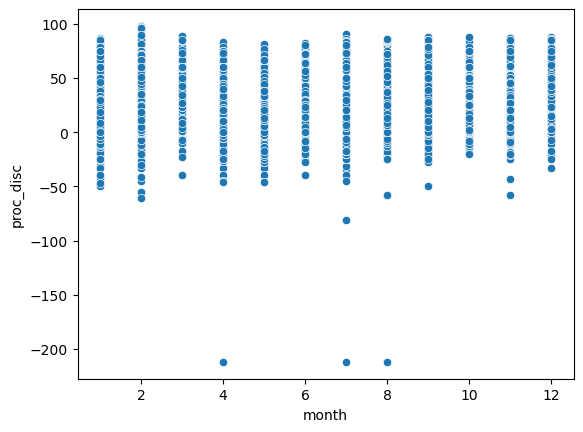

In [83]:
sns.scatterplot(data=orderl_prod, y='proc_disc', x='month')

In [84]:
0

0

<AxesSubplot:xlabel='datemonthday', ylabel='Income'>

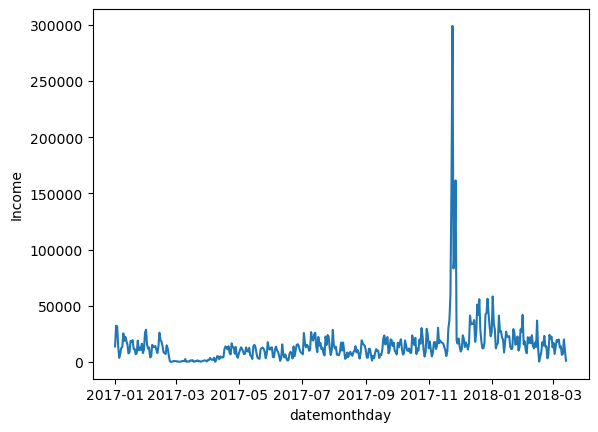

In [85]:
sns.lineplot(data=disc_unit_price_total, x='datemonthday', y= 'Income')

<AxesSubplot:xlabel='datemonthday', ylabel='discount'>

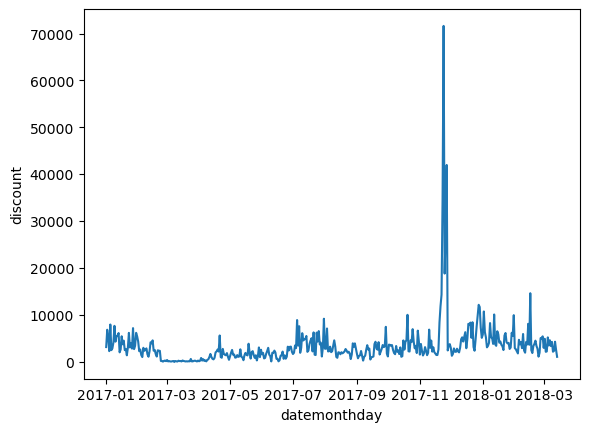

In [86]:
sns.lineplot(data=disc_unit_price_total, x='datemonthday', y= 'discount')

<AxesSubplot:xlabel='datemonthday', ylabel='unit_price_total'>

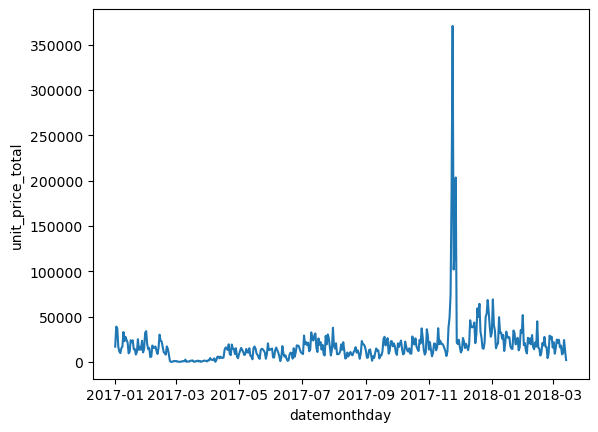

In [87]:
sns.lineplot(data=disc_unit_price_total, x='datemonthday', y= 'unit_price_total')

In [88]:
disc_unit_price_total_nov_febr=disc_unit_price_total.loc[disc_unit_price_total['datemonthday'].between('2017-11-15', '2018-01-15'),:]

In [89]:
disc_marchapril = disc_unit_price_total.loc[disc_unit_price_total['datemonthday'].between('2017-02-23', '2017-04-16'),:]

In [90]:
disc_marchapril.head()

datemonthday  discount  unit_price_total  Income
53   2017-02-23    136.60           1133.55  996.95
54   2017-02-24    117.82             99.98  -17.84
55   2017-02-25      2.00             32.99   30.99
56   2017-02-26    143.90            644.91  501.01
57   2017-02-27    226.02           1096.82  870.80

In [91]:
orderl_prod['datemonthday']=pd.to_datetime(orderl_prod['datemonthday'])

In [92]:
orderl_prod_less_revenue= orderl_prod.loc[orderl_prod['date'].between('2017-02-23', '2017-04-16')]

In [93]:
orderl_prod_less_revenue.head()

id_order                date  unit_price  \
8627    327948 2017-02-23 11:05:13      103.99   
8628    327989 2017-02-23 13:31:05       34.99   
8629    327989 2017-02-23 13:32:41      167.99   
8630    327989 2017-02-23 13:34:12       29.99   
8631    328026 2017-02-23 13:34:23      168.99   

                                                   name brand  discount  \
8627         Toshiba Canvio Basic 25 "3TB USB 3.0 Black   TOS     35.96   
8628  Satechi External Case 25 "Aluminum HDD and SSD...   SAT     10.00   
8629                     Samsung 850 EVO SSD Disk 500GB   SAM     12.00   
8630                   OWC Thunderbolt Cable 0.5m Black   OWC     13.00   
8631  Mac memory Kingston 16GB (2x8GB)-DIMM DDR3 186...   KIN    -49.01   

       price  unit_price_total      type  proc_disc  month datemonthday  \
8627  139.95            103.99  11935397       26.0      2   2017-02-23   
8628   44.99             34.99  12995397       22.0      2   2017-02-23   
8629  179.99            167.99  12215397        7.0      2   2017-02-23   
8630   42.99             29.99      1325       30.0      2   2017-02-23   
8631  119.98            168.99      1364      -41.0      2   2017-02-23   

                range_discount  
8627          Discount 20%-50%  
8628          Discount 20%-50%  
8629           Discount 5%-20%  
8630          Discount 20%-50%  
8631  Higher price than before

In [94]:
ordless = orderl_prod_less_revenue.groupby('range_discount')['id_order'].count().reset_index().sort_values(by='id_order')

[Text(0.5, 1.0, '% of discounts in a very law revenue time')]

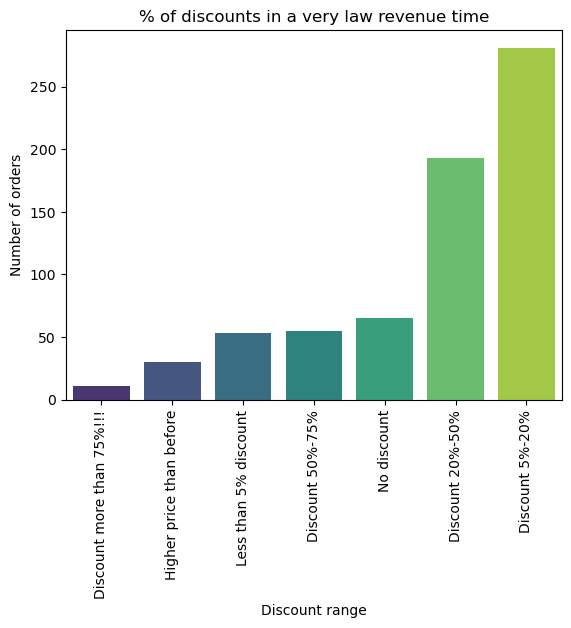

In [95]:
tal=sns.barplot(data = ordless, x='range_discount', y= 'id_order', palette='viridis')            
tal.set_xticklabels(tal.get_xticklabels(),rotation=90)
tal.set(ylabel='Number of orders', xlabel='Discount range')
tal.set(title="% of discounts in a very law revenue time")


[Text(17219.0, 0, ''),
 Text(17226.0, 0, ''),
 Text(17233.0, 0, ''),
 Text(17240.0, 0, ''),
 Text(17247.0, 0, ''),
 Text(17257.0, 0, ''),
 Text(17264.0, 0, ''),
 Text(17271.0, 0, '')]

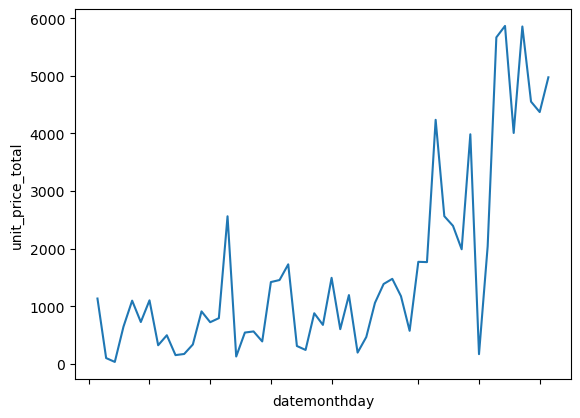

In [96]:
march_april = sns.lineplot(data=disc_marchapril, x='datemonthday', y= 'unit_price_total')
march_april.set_xticklabels(march_april.get_xticklabels(),rotation=90)



<AxesSubplot:xlabel='datemonthday', ylabel='unit_price_total'>

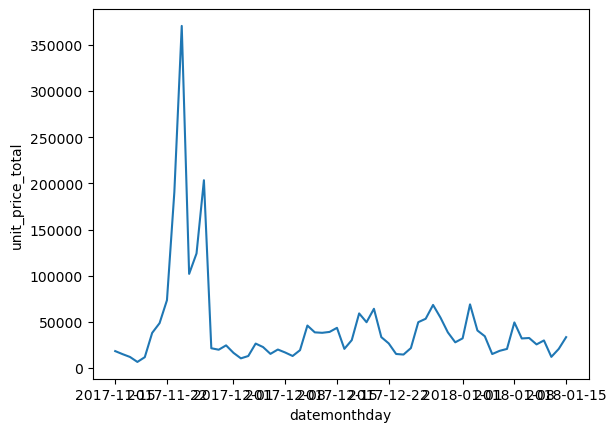

In [97]:
sns.lineplot(data=disc_unit_price_total_nov_febr, x='datemonthday', y= 'unit_price_total')


NameError: name 'chartApple1' is not defined

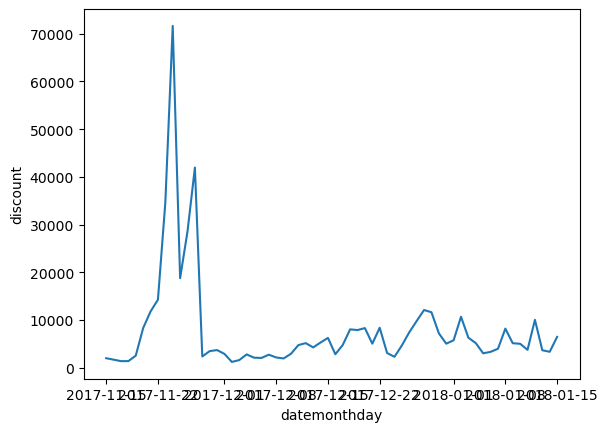

In [98]:
 sns.lineplot(data=disc_unit_price_total_nov_febr, x='datemonthday', y= 'discount')
march_april.set_xticklabels(march_april.get_xticklabels(),rotation=90)
chartApple1.set(ylabel='Number of orders', xlabel='Discount type')
chartApple1.set(title="Apple: discounts")

<AxesSubplot:xlabel='month'>

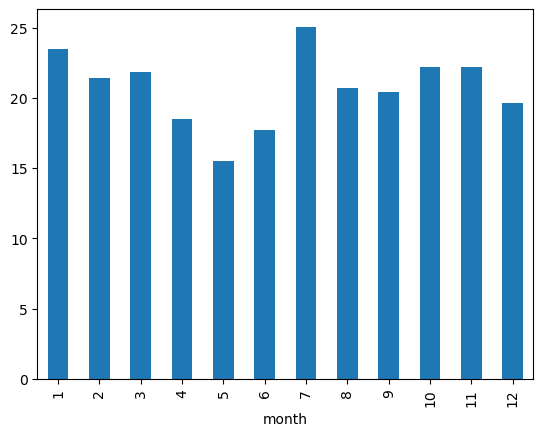

In [ ]:
orderl_prod.groupby(by='month')['proc_disc'].mean().plot.bar()

In [ ]:
brands_qu.head(20)

short              long
0    8MO         8Mobility
1    ACM              Acme
2    ADN            Adonit
3    AII             Aiino
4    AKI            Akitio
5    ALL         Allocacoc
6    AP2             Apple
7    APP             Apple
8    BAN        Band&Strap
9    BEA             Beats
10   BEL            Belkin
11   BEZ             Be.ez
12   BLL        BlueLounge
13   BLM  Blue Microphones
14   BNQ              BenQ
15   BOD        BodyGuardz
16   BOO              Booq
17   BOS              Bose
18   BTC         Boostcase
19   CAD              Bose

In [101]:
orderl_prod = orderl_prod.merge(brands_qu, how='left', left_on='brand', right_on='short')

In [ ]:
orderl_prod.head()

id_order                date  unit_price  \
0    299545 2017-01-01 01:46:16       47.49   
1    299546 2017-01-01 01:50:34       18.99   
2    295347 2017-01-01 01:54:11       72.19   
3    299556 2017-01-01 02:20:14       60.90   
4    299561 2017-01-01 02:38:50      142.49   

                                                name brand  discount   price  \
0  OWC In-line Digital Temperature Sensor Kit HDD...   OWC     13.50   60.99   
1               iOttie Easy View 2 Car Black Support   IOT      3.96   22.95   
2  Apple 85W MagSafe 2 charger MacBook Pro screen...   APP     16.81   89.00   
3                 (Open) Crucial 240GB SSD 7mm BX200   CRU     16.09   76.99   
4                 Pebble Smartwatch Time Steel Black   PEB    157.50  299.99   

   unit_price_total  proc_disc  month datemonthday    range_discount short  \
0             47.49       22.0      1   2017-01-01  Discount 20%-50%   OWC   
1             18.99       17.0      1   2017-01-01   Discount 5%-20%   IOT   
2             72.19       19.0      1   2017-01-01   Discount 5%-20%   APP   
3             60.90       21.0      1   2017-01-01  Discount 20%-50%   CRU   
4            142.49       53.0      1   2017-01-01  Discount 50%-75%   PEB   

      long  
0      OWC  
1   iOttie  
2    Apple  
3  Crucial  
4   Pebble

In [ ]:
orderl_prod = orderl_prod.drop('short', axis = 1)

In [102]:
orderl_prod.head()

id_order                date  unit_price  \
0    299545 2017-01-01 01:46:16       47.49   
1    299546 2017-01-01 01:50:34       18.99   
2    295347 2017-01-01 01:54:11       72.19   
3    299556 2017-01-01 02:20:14       60.90   
4    299561 2017-01-01 02:38:50      142.49   

                                                name brand  discount   price  \
0  OWC In-line Digital Temperature Sensor Kit HDD...   OWC     13.50   60.99   
1               iOttie Easy View 2 Car Black Support   IOT      3.96   22.95   
2  Apple 85W MagSafe 2 charger MacBook Pro screen...   APP     16.81   89.00   
3                 (Open) Crucial 240GB SSD 7mm BX200   CRU     16.09   76.99   
4                 Pebble Smartwatch Time Steel Black   PEB    157.50  299.99   

   unit_price_total      type  proc_disc  month datemonthday  \
0             47.49  12755395       22.0      1   2017-01-01   
1             18.99      5720       17.0      1   2017-01-01   
2             72.19  13005399       19.0      1   2017-01-01   
3             60.90      1298       21.0      1   2017-01-01   
4            142.49  11905404       53.0      1   2017-01-01   

     range_discount short     long  
0  Discount 20%-50%   OWC      OWC  
1   Discount 5%-20%   IOT   iOttie  
2   Discount 5%-20%   APP    Apple  
3  Discount 20%-50%   CRU  Crucial  
4  Discount 50%-75%   PEB   Pebble

In [177]:
tra = orderl_prod.groupby('range_discount')['unit_price_total'].sum().reset_index().sort_values(by='unit_price_total')

In [178]:
moo = orderl_prod.groupby('range_discount')['id_order'].count().reset_index().sort_values(by='id_order')

In [179]:
tra.head()

range_discount  unit_price_total
3  Discount more than 75%!!!          11666.73
2           Discount 50%-75%         135592.43
4   Higher price than before         282193.50
6                No discount         456572.50
5      Less than 5% discount        1499495.90

In [174]:
mol = orderl_prod.groupby('range_discount').agg({'unit_price_total':'sum','id_order':'count'}).reset_index().sort_values(by='unit_price_total')

In [180]:
mol

range_discount  unit_price_total  id_order
3  Discount more than 75%!!!          11666.73       569
2           Discount 50%-75%         135592.43      4156
4   Higher price than before         282193.50       849
6                No discount         456572.50      3368
5      Less than 5% discount        1499495.90      4806
0           Discount 20%-50%        1830948.16     18410
1            Discount 5%-20%        3755150.95     22166

<AxesSubplot:xlabel='proc_disc', ylabel='unit_price_total'>

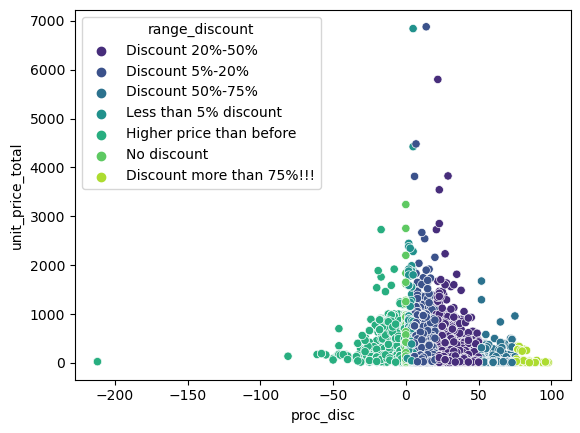

In [181]:
sns.scatterplot(data = orderl_prod, y='unit_price_total', x= 'proc_disc', hue = 'range_discount', palette = 'viridis')

<AxesSubplot:xlabel='id_order', ylabel='unit_price_total'>

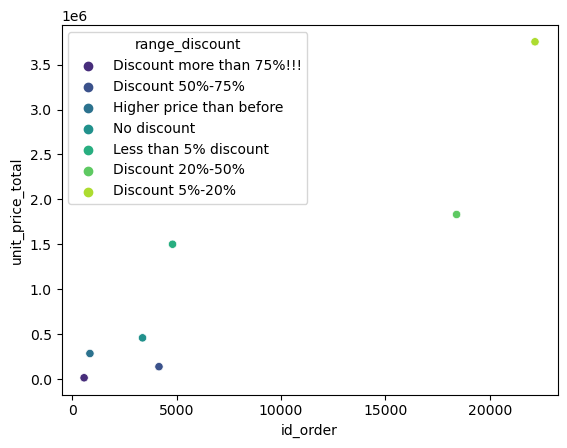

In [176]:
sns.scatterplot(data = mol, y='unit_price_total', x= 'id_order', hue = 'range_discount',palette = 'viridis')

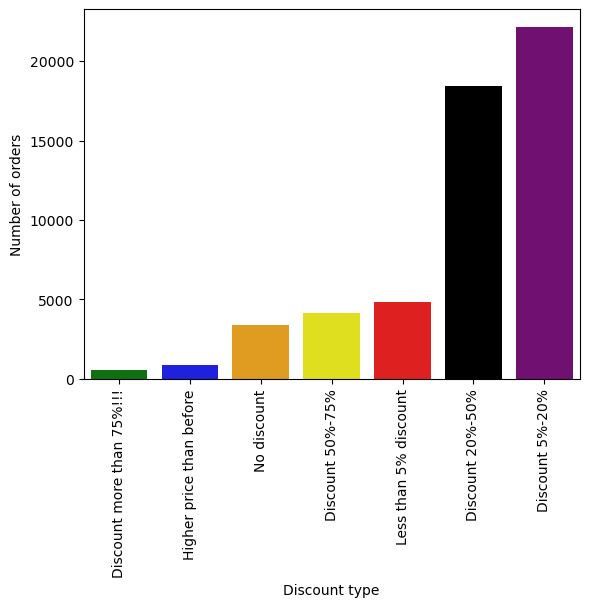

In [191]:
mooo = sns.barplot(data = moo, x= 'range_discount' , y = 'id_order' , palette=['green', 'blue', 'orange', 'yellow', 'red', 'black', 'purple'] )
mooo.set_xticklabels(mooo.get_xticklabels(),rotation=90)
mooo.set(ylabel='Number of orders', xlabel='Discount type');


In [ ]:
tra.head()

range_discount  unit_price_total
3  Discount more than 75%!!!          11666.73
2           Discount 50%-75%         135592.43
4   Higher price than before         282193.50
6                No discount         456572.50
5      Less than 5% discount        1499495.90

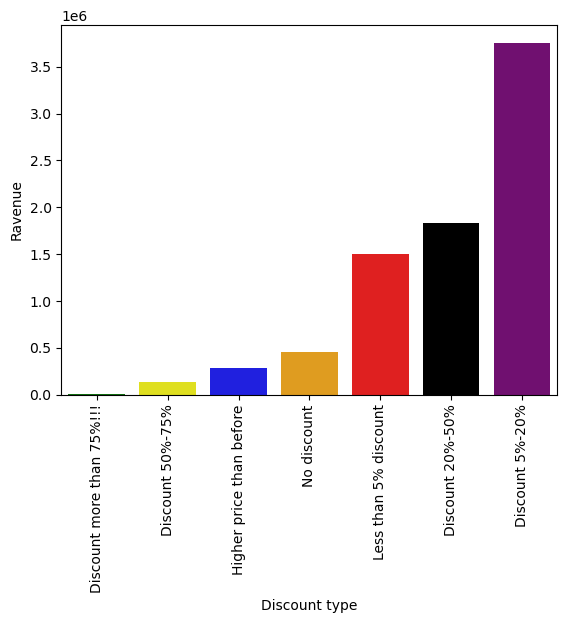

In [192]:
bu = sns.barplot(data = tra, x= 'range_discount' , y = 'unit_price_total' , palette=['green', 'yellow', 'blue', 'orange', 'red', 'black', 'purple'] )
bu.set_xticklabels(bu.get_xticklabels(),rotation=90)
bu.set(ylabel='Ravenue', xlabel='Discount type');


In [ ]:
def disco(orderl_prod):
    if orderl_prod['discount']==0:
        a='no discount'
    elif 0<orderl_prod['discount']<=50:
        a= '0-50 euro'
    elif 50<orderl_prod['discount']<=200:
        a='50-200 euro'
    elif 200<orderl_prod['discount']<=1000:
        a='200-1000 euro'
    elif orderl_prod['discount']>1000:
        a='>1000 euro'
    else:
        a='Price increased'
    return a
        

In [ ]:
orderl_prod['discount_category']=orderl_prod.apply(disco, axis=1)

In [ ]:
trat.head()

discount_category  unit_price_total
3        >1000 euro           3704.35
5       no discount         241723.01
1     200-1000 euro         284368.24
4   Price increased         333672.98
2       50-200 euro        2498627.38

In [339]:
def pricee(orderl_prod):
    if orderl_prod['price']==0:
        a='for free'
    elif 0<orderl_prod['price']<=400:
        a= '0-400 euro'
  
    elif 400<orderl_prod['price']<=800:
        a='400-800 euro'
    else: 
        a='>800 euro'
    
    return a

In [340]:
orderl_prod['price_category']=orderl_prod.apply(pricee, axis=1)

In [341]:
orderl_prodmore = orderl_prod.loc[orderl_prod['proc_disc']>0,:]

In [342]:
orderl_prod.head()

id_order                date  unit_price  \
0    299545 2017-01-01 01:46:16       47.49   
1    299546 2017-01-01 01:50:34       18.99   
2    295347 2017-01-01 01:54:11       72.19   
3    299556 2017-01-01 02:20:14       60.90   
4    299561 2017-01-01 02:38:50      142.49   

                                                name brand  discount   price  \
0  OWC In-line Digital Temperature Sensor Kit HDD...   OWC     13.50   60.99   
1               iOttie Easy View 2 Car Black Support   IOT      3.96   22.95   
2  Apple 85W MagSafe 2 charger MacBook Pro screen...   APP     16.81   89.00   
3                 (Open) Crucial 240GB SSD 7mm BX200   CRU     16.09   76.99   
4                 Pebble Smartwatch Time Steel Black   PEB    157.50  299.99   

   unit_price_total      type  proc_disc  month datemonthday  \
0             47.49  12755395       22.0      1   2017-01-01   
1             18.99      5720       17.0      1   2017-01-01   
2             72.19  13005399       19.0      1   2017-01-01   
3             60.90      1298       21.0      1   2017-01-01   
4            142.49  11905404       53.0      1   2017-01-01   

     range_discount short     long price_category cheap_or_not  
0  Discount 20%-50%   OWC      OWC     0-400 euro        cheap  
1   Discount 5%-20%   IOT   iOttie     0-400 euro        cheap  
2   Discount 5%-20%   APP    Apple     0-400 euro        cheap  
3  Discount 20%-50%   CRU  Crucial     0-400 euro        cheap  
4  Discount 50%-75%   PEB   Pebble     0-400 euro        cheap

In [343]:
orderl_prodApp = orderl_prod.loc[orderl_prod['long'] == 'Apple',:]

In [344]:
oprApp = orderl_prodApp.groupby(by=['price_category','datemonthday'],as_index=False).agg({'proc_disc':'mean', 'unit_price_total':'sum'})
oprApp.head()

price_category datemonthday  proc_disc  unit_price_total
0     0-400 euro   2017-01-01  19.200000            498.26
1     0-400 euro   2017-01-02  14.704545           3177.37
2     0-400 euro   2017-01-03  19.461538           1598.91
3     0-400 euro   2017-01-04  28.090909            508.93
4     0-400 euro   2017-01-05  27.714286            720.34

In [345]:
typessApp= orderl_prodApp.groupby(by=['type','datemonthday'],as_index=False).agg({'proc_disc':'mean', 'unit_price_total':'sum'})


In [346]:
opr = orderl_prod.groupby(by=['price_category','datemonthday'],as_index=False).agg({'proc_disc':'mean', 'unit_price_total':'sum'})
opr.head()

price_category datemonthday  proc_disc  unit_price_total
0     0-400 euro   2017-01-01  21.327869          10700.65
1     0-400 euro   2017-01-02  17.869565          29729.18
2     0-400 euro   2017-01-03  20.003356          23746.84
3     0-400 euro   2017-01-04  20.221374          10761.03
4     0-400 euro   2017-01-05  38.698630           9242.36

<AxesSubplot:xlabel='datemonthday', ylabel='proc_disc'>

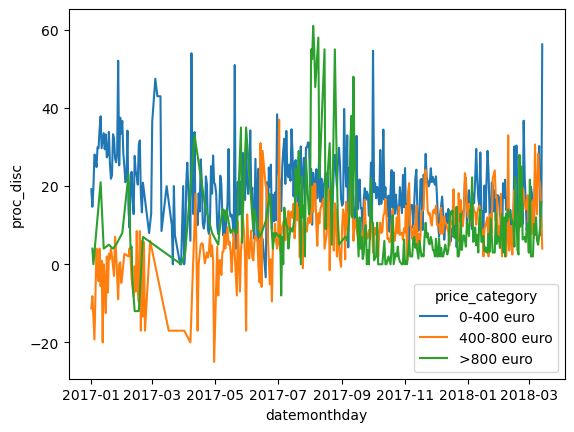

In [347]:
sns.lineplot(data=oprApp, x = 'datemonthday' , y='proc_disc', hue = 'price_category')

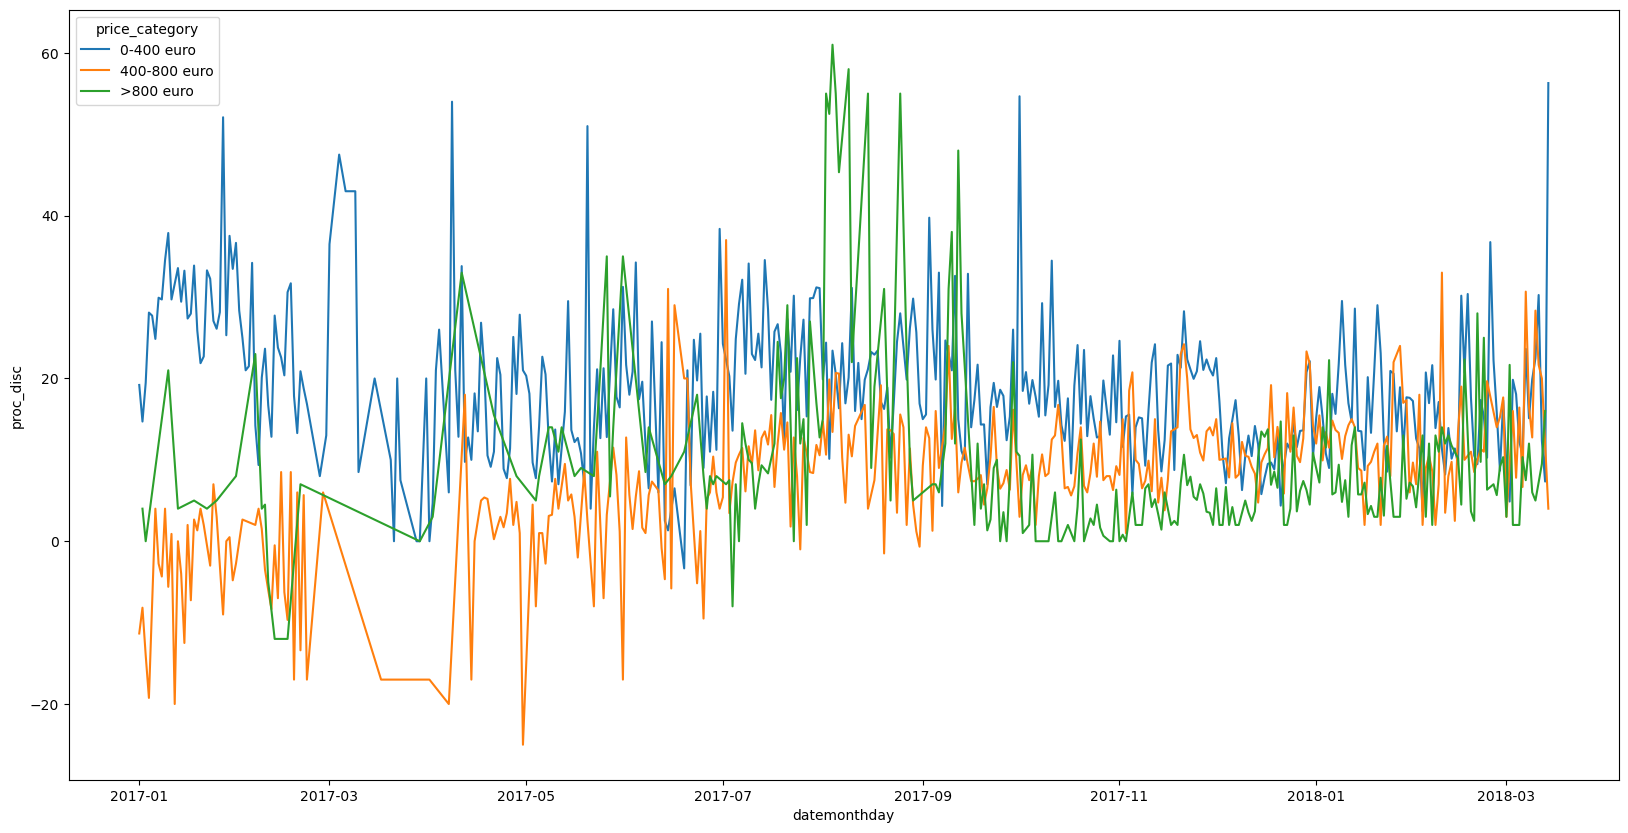

In [348]:
fig, ax = plt.subplots(figsize=(20, 10));
sns.lineplot(ax=ax, data=oprApp, x = 'datemonthday' , y='proc_disc', hue = 'price_category');

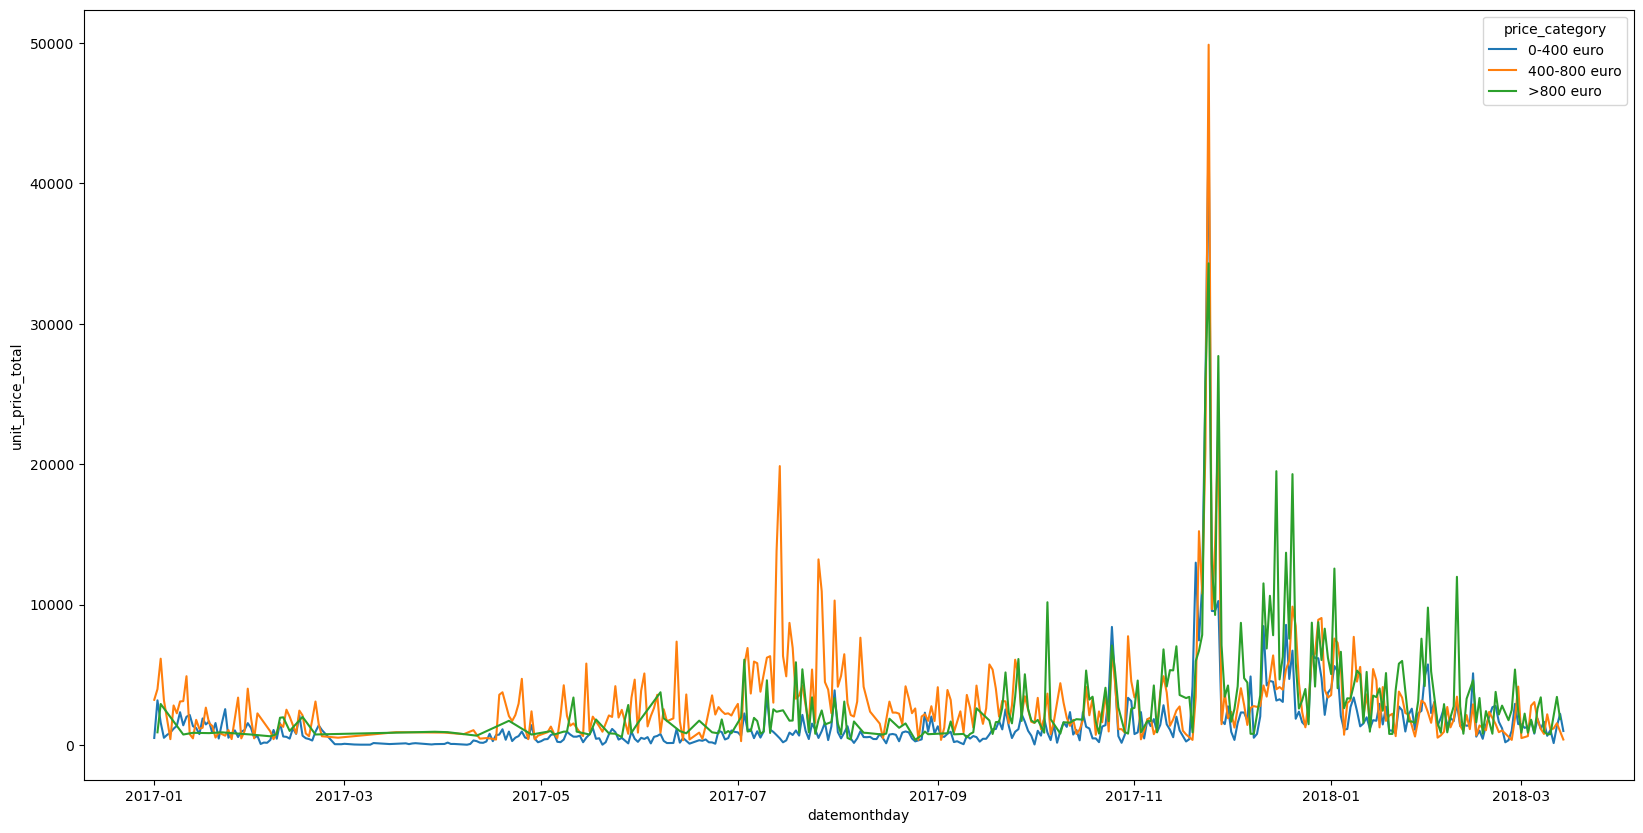

In [349]:
fig, ax = plt.subplots(figsize=(20, 10));
sns.lineplot(ax=ax, data=oprApp, x = 'datemonthday' , y='unit_price_total', hue = 'price_category');

In [350]:
typess= orderl_prod.groupby(by=['type','datemonthday'],as_index=False).agg({'proc_disc':'mean', 'unit_price_total':'sum'})


In [351]:
types

NameError: name 'types' is not defined

In [ ]:
sns.lineplot(data=typess, x = 'datemonthday' , y='proc_disc', hue = 'type')

<AxesSubplot:xlabel='datemonthday', ylabel='proc_disc'>

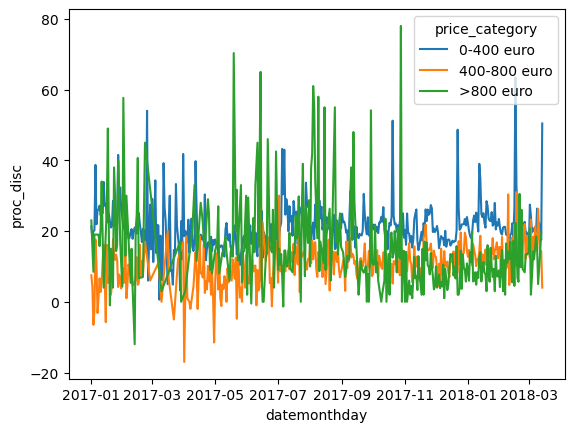

In [353]:
sns.lineplot(data=opr, x = 'datemonthday' , y='proc_disc', hue = 'price_category')

In [210]:
def cheap_not(orderl_prod):
    if orderl_prod['price']==0:
        a='for free'
    elif 0<orderl_prod['price']<=400:
        a= 'cheap'
  
    else:
        a='expensive'
    
    return a

In [354]:
orderl_prod['cheap_or_not']=orderl_prod.apply(cheap_not, axis=1)

In [355]:
opraa = orderl_prod.groupby(by=['cheap_or_not','datemonthday'],as_index=False).agg({'proc_disc':'mean', 'unit_price_total':'sum'})


<AxesSubplot:xlabel='datemonthday', ylabel='proc_disc'>

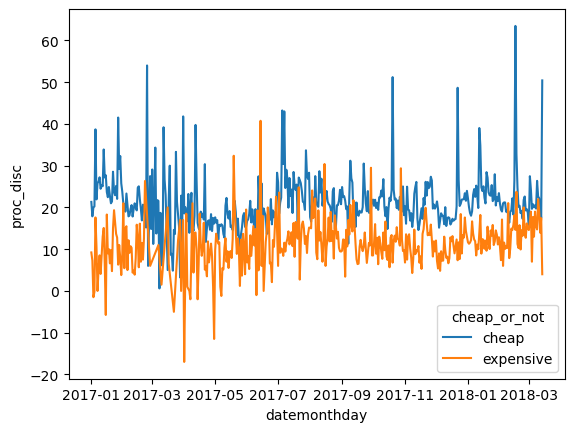

In [325]:
sns.lineplot(data=opraa, x = 'datemonthday' , y='proc_disc', hue = 'cheap_or_not')

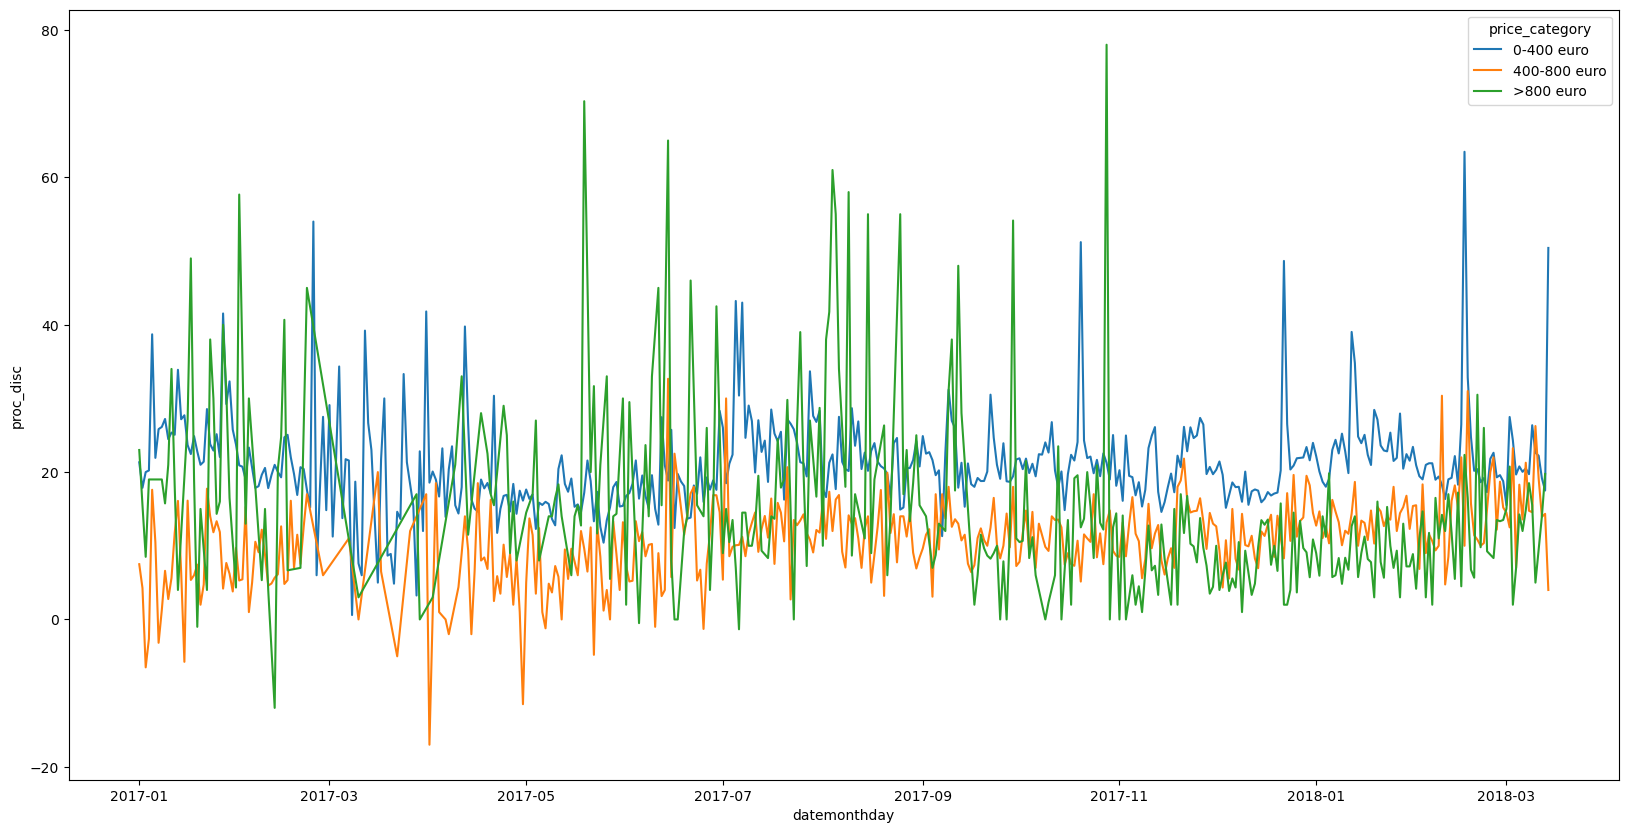

In [356]:
fig, ax = plt.subplots(figsize=(20, 10));
sns.lineplot(ax=ax, data=opr, x = 'datemonthday' , y='proc_disc', hue = 'price_category');

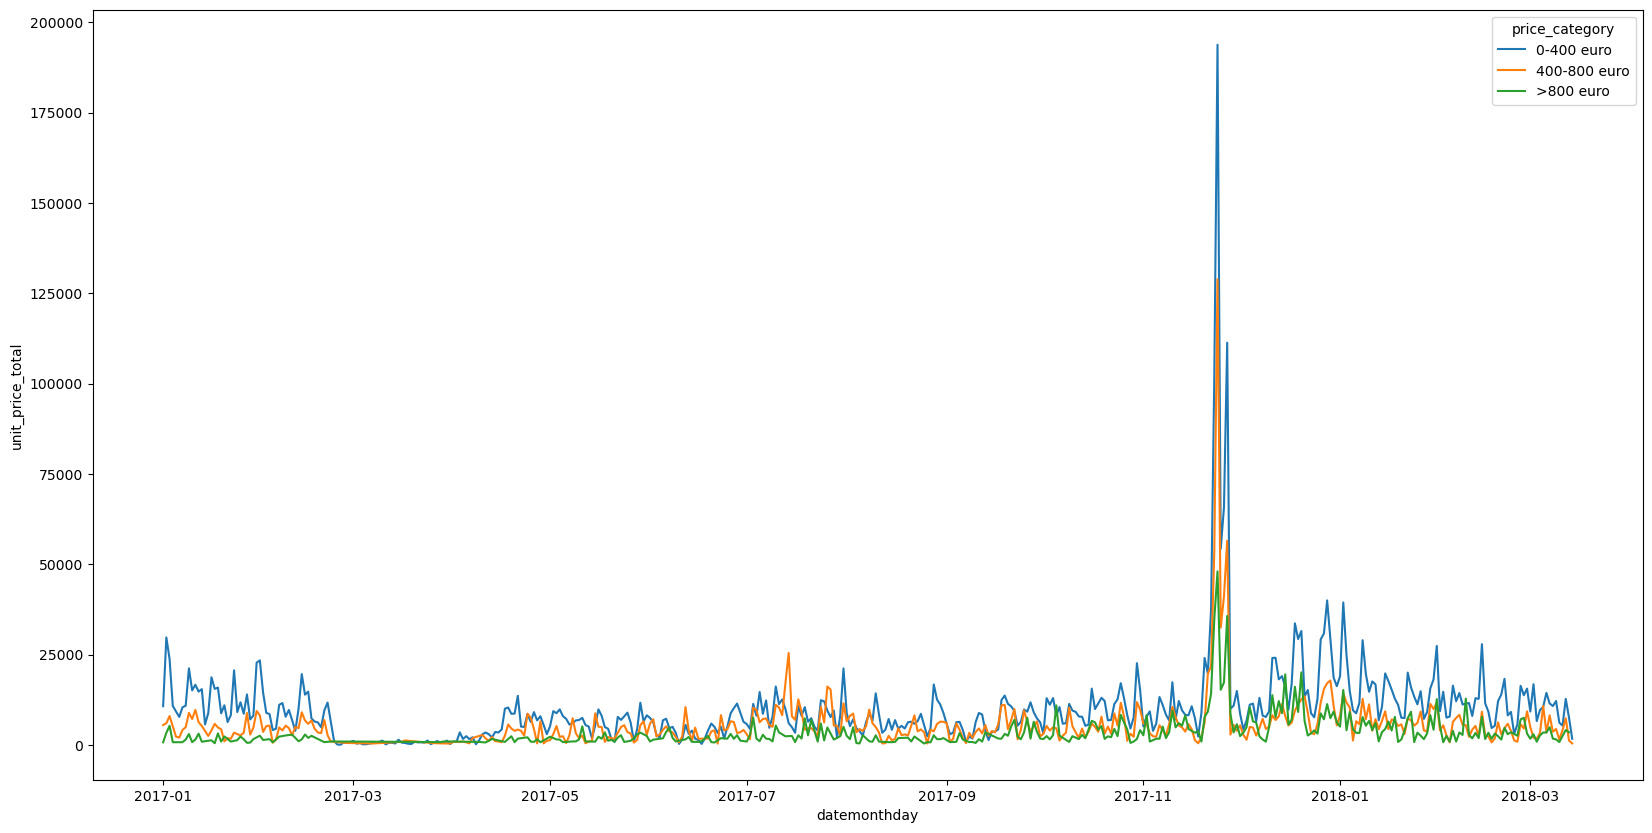

In [357]:
fig, ax = plt.subplots(figsize=(20, 10));
sns.lineplot(ax=ax, data=opr, x = 'datemonthday' , y='unit_price_total', hue = 'price_category');

In [358]:
marchapril = orderl_prod.loc[orderl_prod['datemonthday'].between('2017-02-23', '2017-04-16'),:]


In [359]:
ocrober =  orderl_prod.loc[orderl_prod['datemonthday'].between('2017-10-01', '2017-11-01'),:]

In [360]:
octoberApp = orderl_prod.loc[orderl_prod['datemonthday'].between('2017-10-01', '2017-11-01')&(orderl_prod['long']=='Apple'),:]

In [361]:
marchaprilApp = orderl_prod.loc[(orderl_prod['datemonthday'].between('2017-02-23', '2017-04-16'))&(orderl_prod['long']=='Apple'),:]

In [362]:
marchaprilApp.head()

id_order                date  unit_price  \
8642    329103 2017-02-26 11:28:46       53.99   
8649    329597 2017-02-27 09:38:11      515.99   
8661    330530 2017-02-28 18:33:58       51.29   
8669    330887 2017-03-01 11:46:37       11.99   
8673    330991 2017-03-01 16:11:36       69.99   

                                                   name brand  discount  \
8642                  Apple Mac Keyboard Keypad Spanish   APP      5.01   
8649                       Apple iPhone 64GB Space Gray   APP     33.01   
8661                  Apple Mac Keyboard Keypad Spanish   APP      7.71   
8669  Apple Lightning Cable Connector to USB 1m Whit...   APP     13.01   
8673  60W MagSafe 2 Apple MacBook Pro Retina display...   APP     19.01   

      price  unit_price_total      type  proc_disc  month datemonthday  \
8642   59.0             53.99  13855401        8.0      2   2017-02-26   
8649  549.0            515.99  51601716        6.0      2   2017-02-27   
8661   59.0             51.29  13855401       13.0      2   2017-02-28   
8669   25.0             11.99      1230       52.0      3   2017-03-01   
8673   89.0             69.99  13005399       21.0      3   2017-03-01   

        range_discount short   long price_category cheap_or_not  
8642   Discount 5%-20%   APP  Apple     0-400 euro        cheap  
8649   Discount 5%-20%   APP  Apple   400-800 euro    expensive  
8661   Discount 5%-20%   APP  Apple     0-400 euro        cheap  
8669  Discount 50%-75%   APP  Apple     0-400 euro        cheap  
8673  Discount 20%-50%   APP  Apple     0-400 euro        cheap

In [363]:
marchapril1 = marchapril.groupby(by=['price_category','datemonthday'],as_index=False).agg({'proc_disc':'mean', 'unit_price_total':'sum'})


In [364]:
marchapril1.head()

price_category datemonthday  proc_disc  unit_price_total
0     0-400 euro   2017-02-23  15.200000           1133.55
1     0-400 euro   2017-02-24  54.000000             99.98
2     0-400 euro   2017-02-25   6.000000             32.99
3     0-400 euro   2017-02-26  17.444444            644.91
4     0-400 euro   2017-02-27  27.500000            580.83

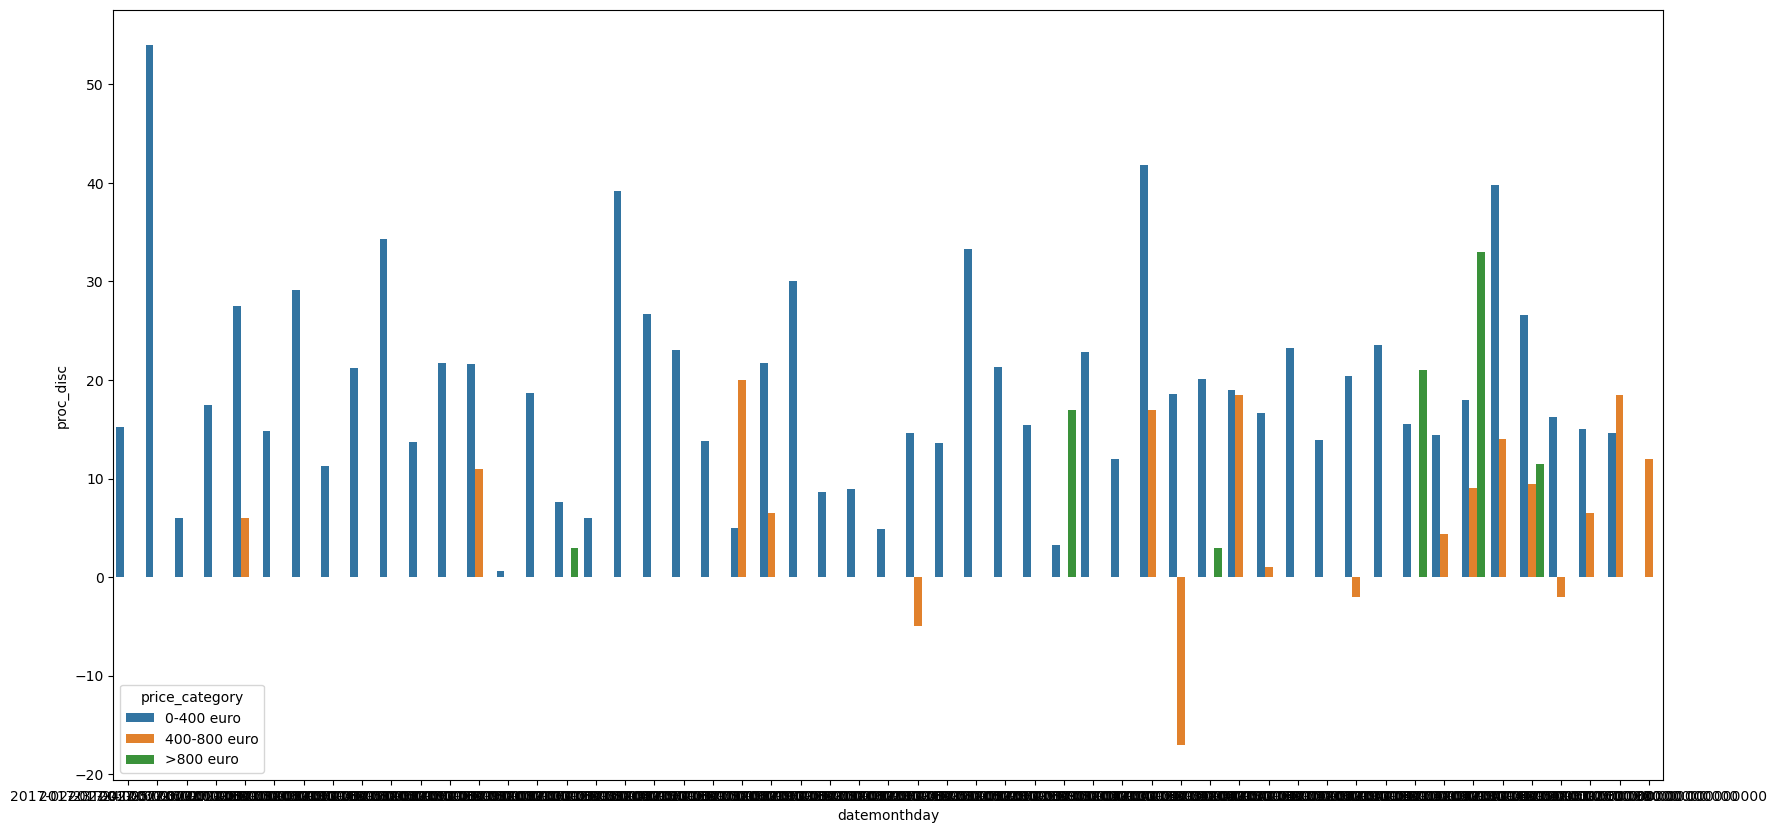

In [365]:
fig, ax = plt.subplots(figsize=(20, 10));
sns.barplot(ax=ax, data=marchapril1, x = 'datemonthday' , y='proc_disc', hue = 'price_category');

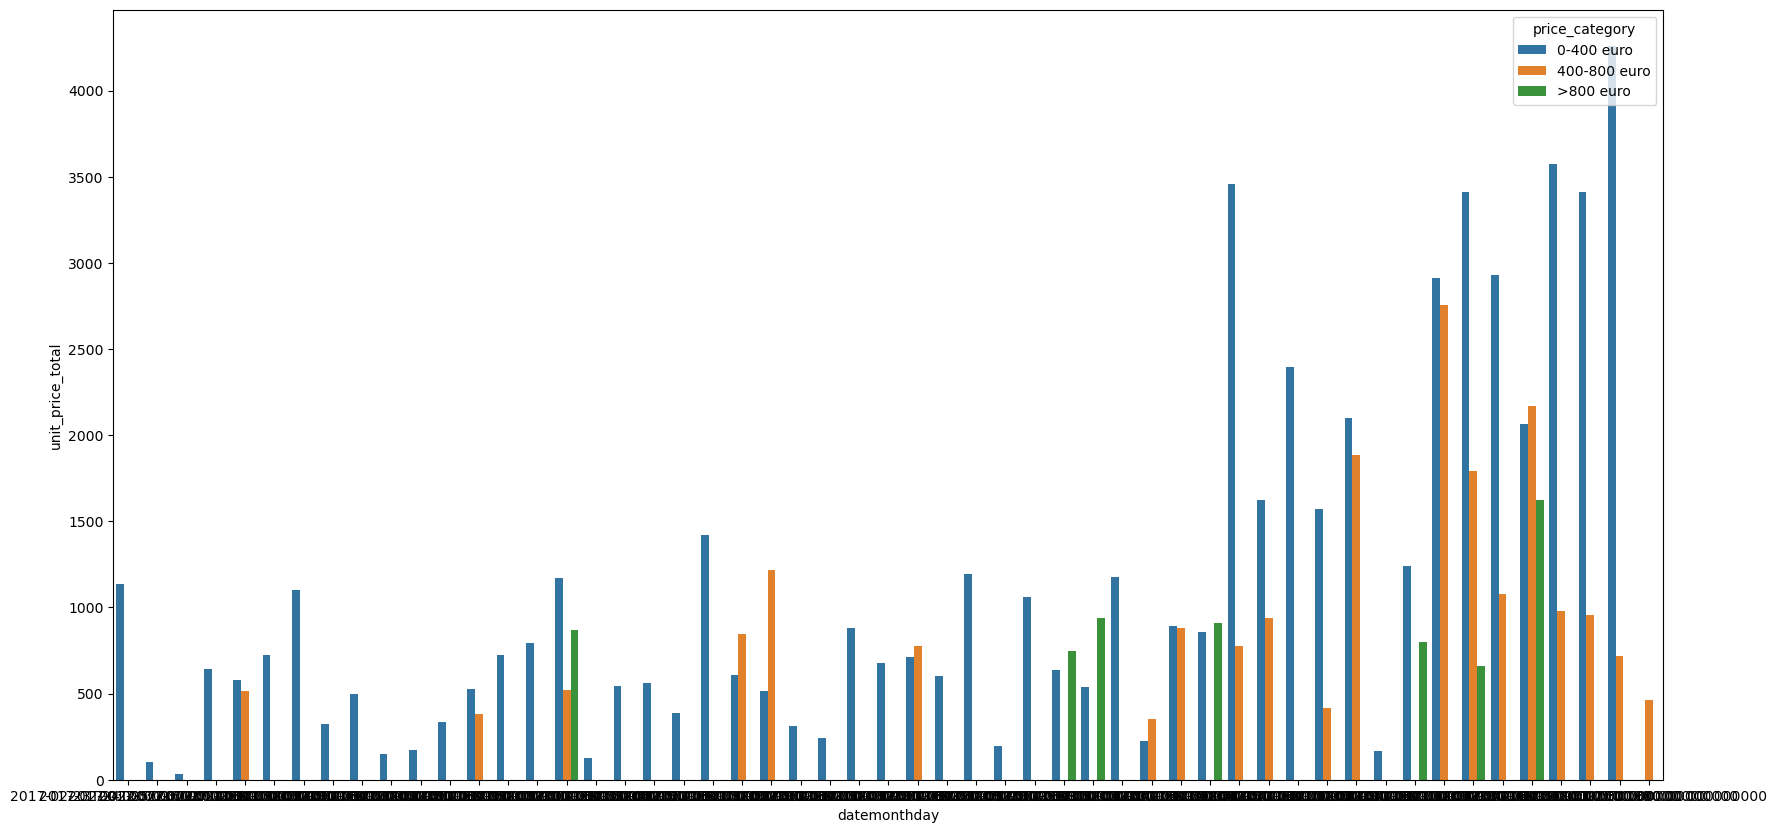

In [222]:
fig, ax = plt.subplots(figsize=(20, 10));
sns.barplot(ax=ax, data=marchapril1, x = 'datemonthday' , y='unit_price_total', hue = 'price_category');

In [366]:
blaack = orderl_prod.loc[orderl_prod['datemonthday'].between('2017-11-23', '2017-12-01'),:]

In [367]:
blaackApp = orderl_prodApp.loc[orderl_prod['datemonthday'].between('2017-11-24', '2017-11-27'),:]

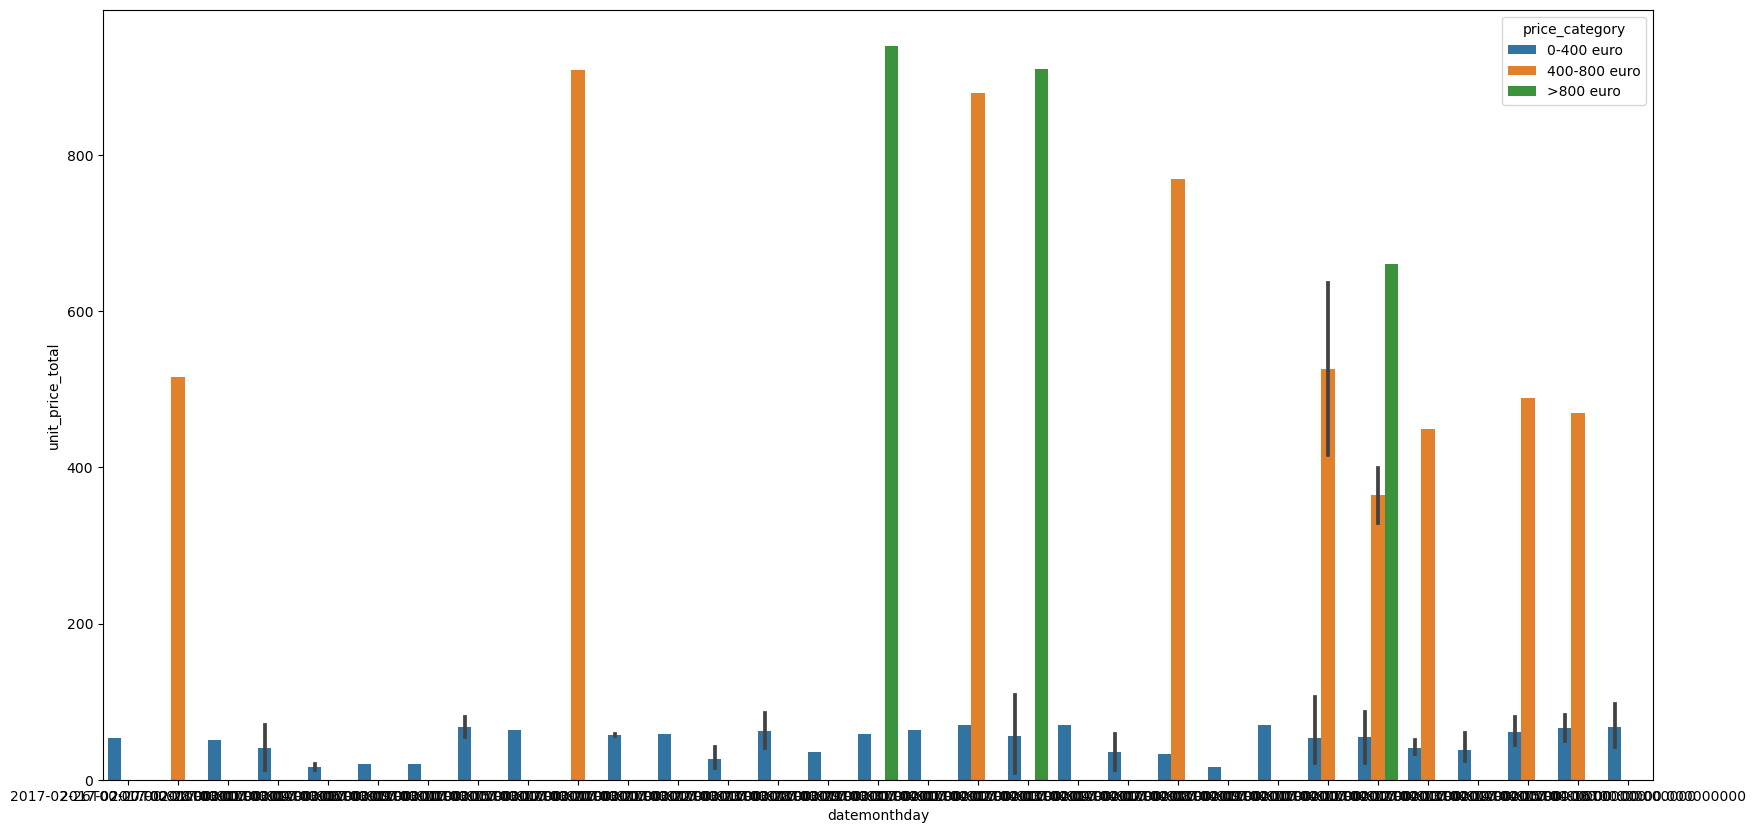

In [368]:
fig, ax = plt.subplots(figsize=(20, 10));
sns.barplot(ax=ax, data=marchaprilApp, x = 'datemonthday' , y='unit_price_total', hue = 'price_category');

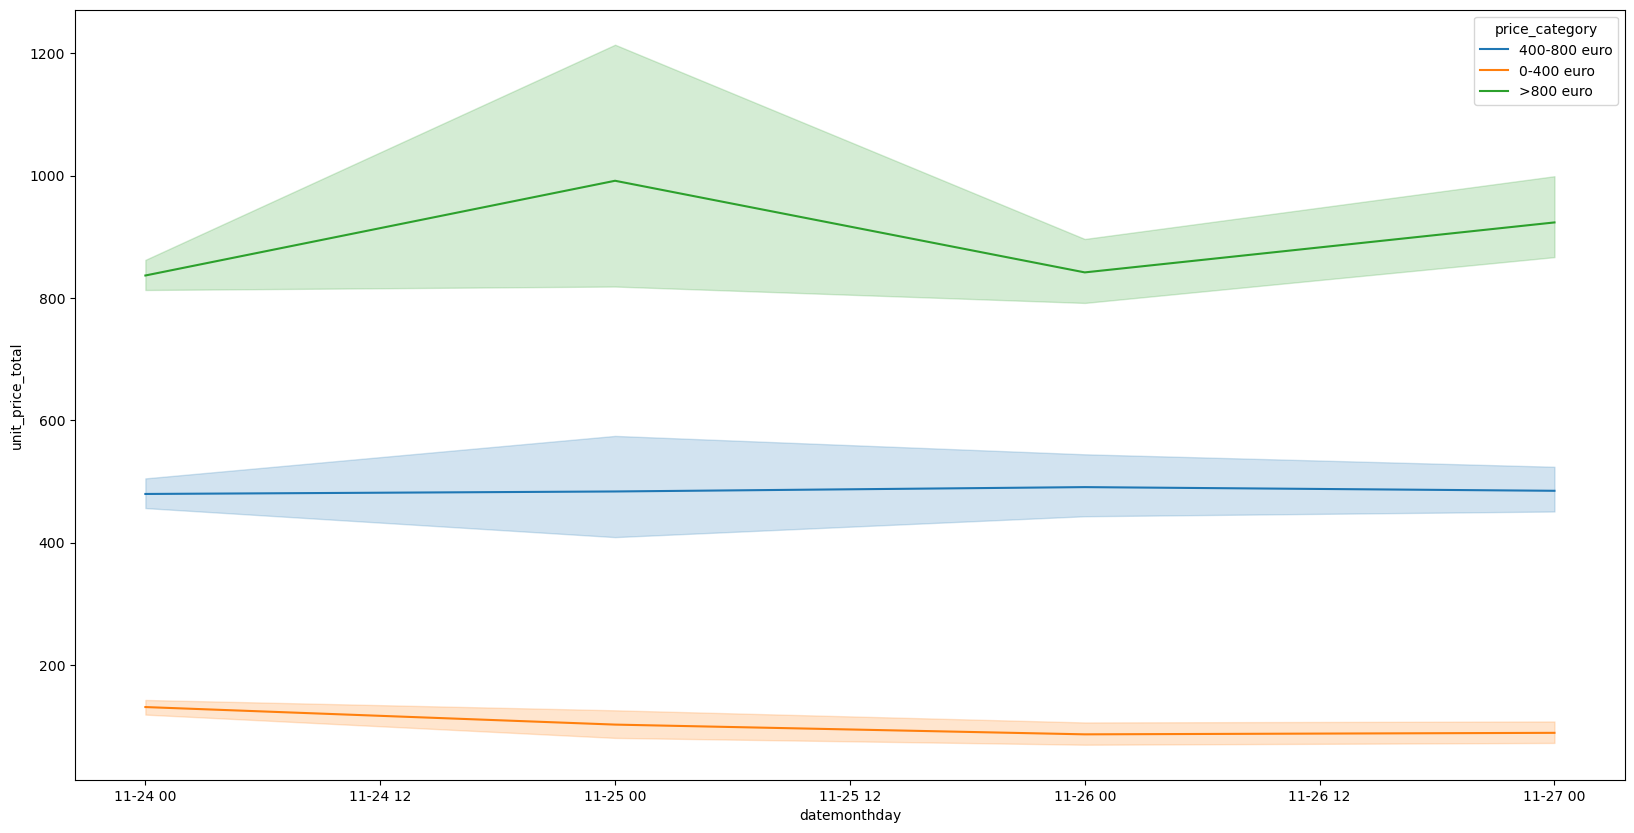

In [369]:
fig, ax = plt.subplots(figsize=(20, 10));
sns.lineplot(ax=ax, data=blaackApp, x = 'datemonthday' , y='unit_price_total', hue = 'price_category');

Text(0.5, 1.0, 'October')

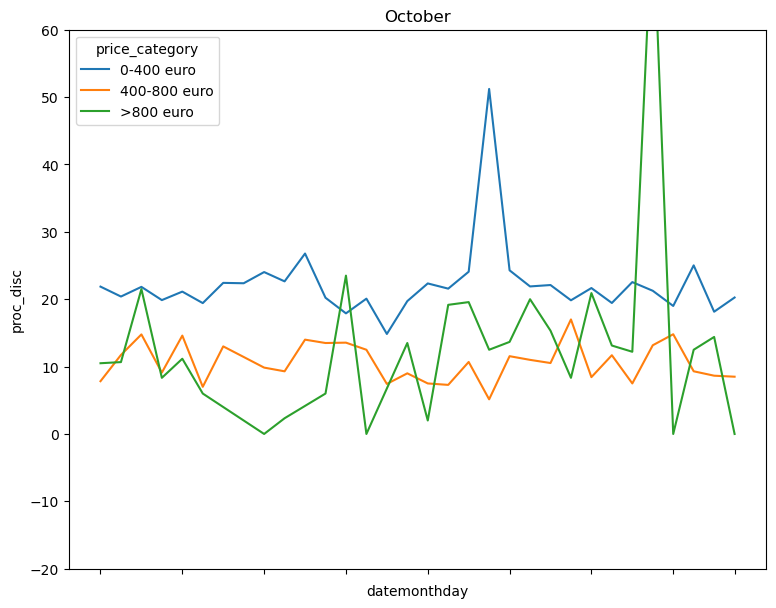

In [370]:
fig, ax = plt.subplots(figsize=(9, 7));
oct = sns.lineplot(data = ocrober, x = 'datemonthday' , y='proc_disc', hue = 'price_category', ci=None)
oct.set_xticklabels(oct.get_xticklabels(),rotation=90)
oct.set_ylim(ymin=-20,ymax=60)
oct.set_title('October')

<AxesSubplot:xlabel='datemonthday', ylabel='proc_disc'>

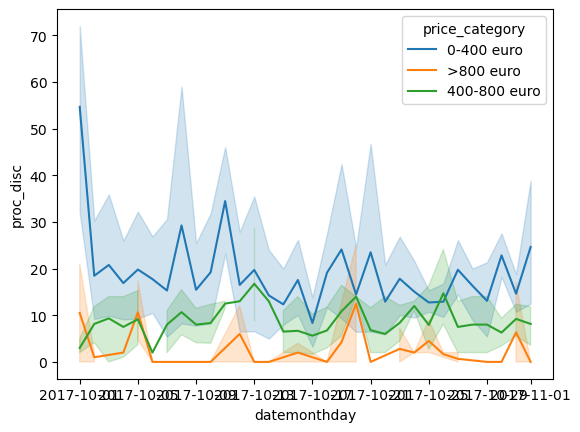

In [371]:
sns.lineplot(data = octoberApp, x = 'datemonthday' , y='proc_disc', hue = 'price_category')

<AxesSubplot:xlabel='datemonthday', ylabel='unit_price_total'>

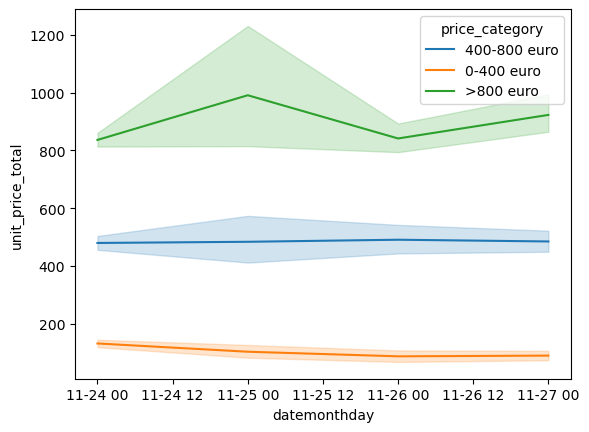

In [227]:
sns.lineplot(data = blaackApp, x = 'datemonthday' , y='unit_price_total', hue = 'price_category')

[Text(0, 0, '2017-02-26T00:00:00.000000000'),
 Text(1, 0, '2017-02-27T00:00:00.000000000'),
 Text(2, 0, '2017-02-28T00:00:00.000000000'),
 Text(3, 0, '2017-03-01T00:00:00.000000000'),
 Text(4, 0, '2017-03-04T00:00:00.000000000'),
 Text(5, 0, '2017-03-06T00:00:00.000000000'),
 Text(6, 0, '2017-03-09T00:00:00.000000000'),
 Text(7, 0, '2017-03-10T00:00:00.000000000'),
 Text(8, 0, '2017-03-15T00:00:00.000000000'),
 Text(9, 0, '2017-03-17T00:00:00.000000000'),
 Text(10, 0, '2017-03-20T00:00:00.000000000'),
 Text(11, 0, '2017-03-21T00:00:00.000000000'),
 Text(12, 0, '2017-03-22T00:00:00.000000000'),
 Text(13, 0, '2017-03-23T00:00:00.000000000'),
 Text(14, 0, '2017-03-28T00:00:00.000000000'),
 Text(15, 0, '2017-03-29T00:00:00.000000000'),
 Text(16, 0, '2017-03-31T00:00:00.000000000'),
 Text(17, 0, '2017-04-01T00:00:00.000000000'),
 Text(18, 0, '2017-04-02T00:00:00.000000000'),
 Text(19, 0, '2017-04-03T00:00:00.000000000'),
 Text(20, 0, '2017-04-04T00:00:00.000000000'),
 Text(21, 0, '2017-04-0

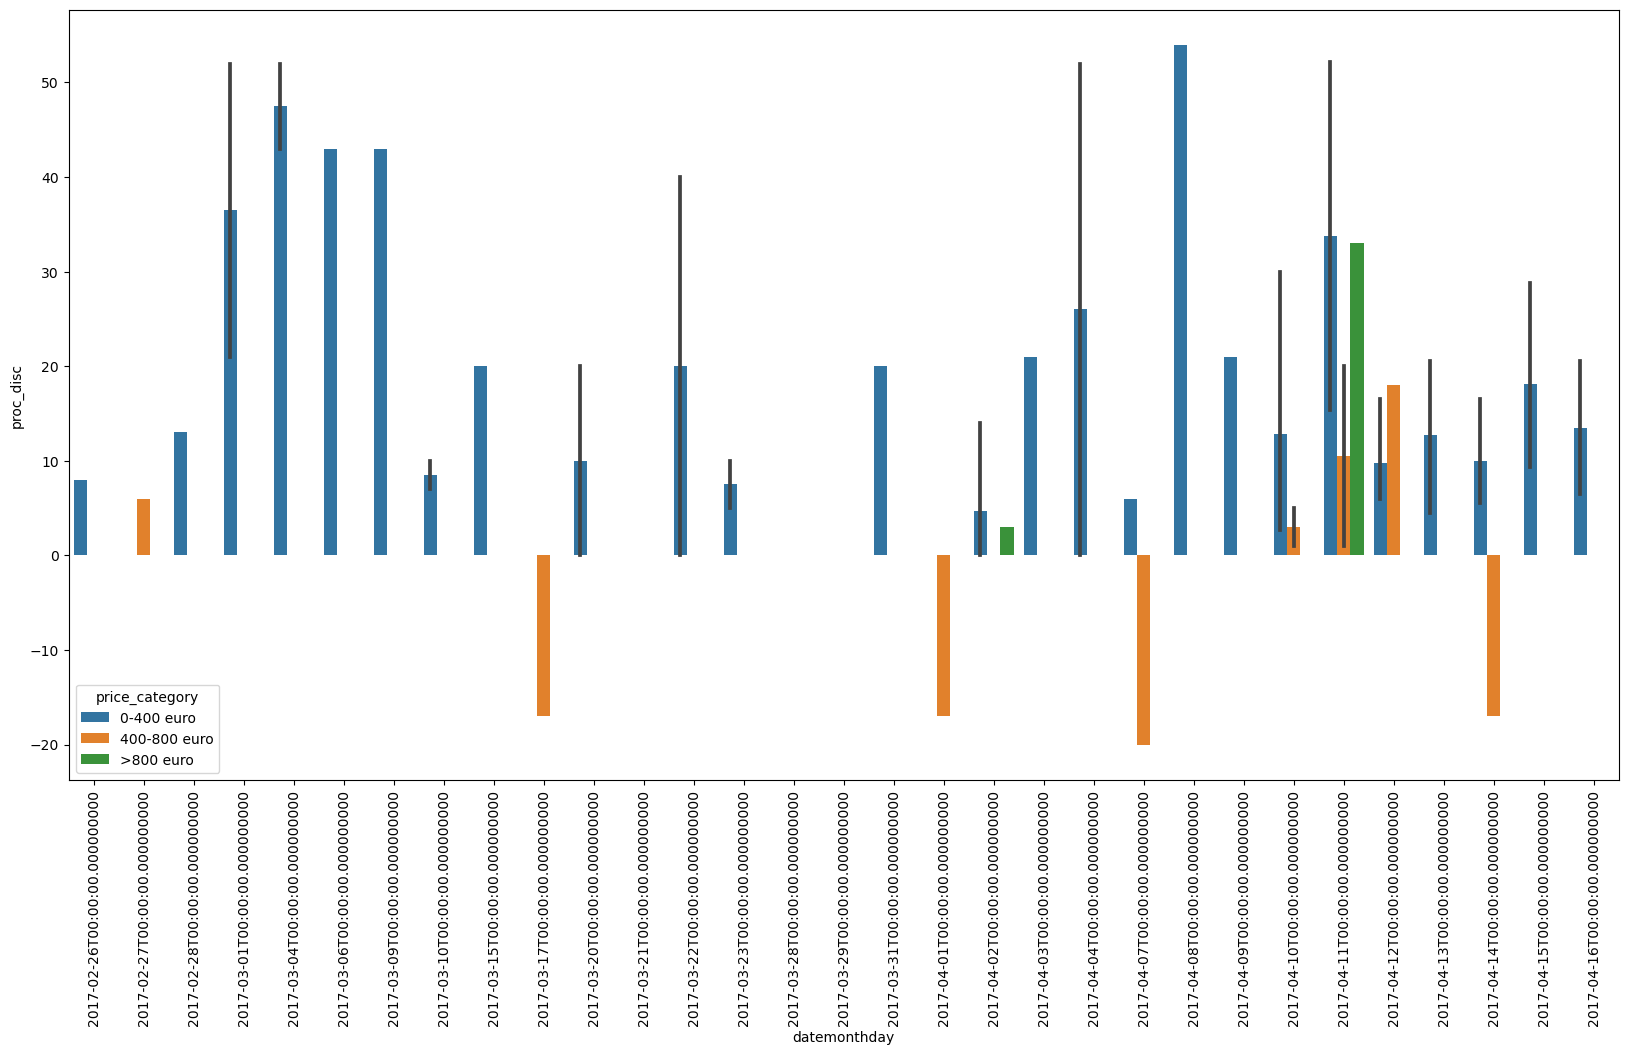

In [372]:
fig, ax = plt.subplots(figsize=(20, 10));
pop = sns.barplot(ax=ax, data=marchaprilApp, x = 'datemonthday' , y='proc_disc', hue = 'price_category')
pop.set_xticklabels(pop.get_xticklabels(),rotation=90)


(-20.0, 60.0)

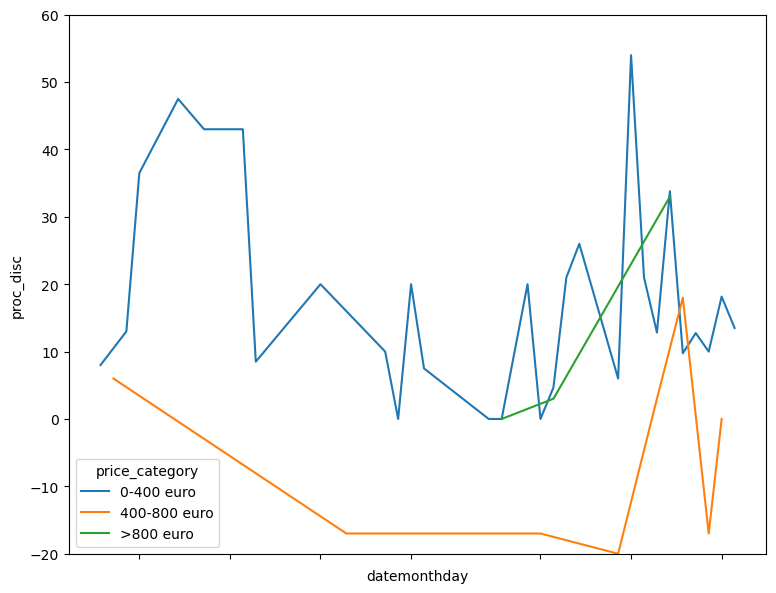

In [373]:
fig, ax = plt.subplots(figsize=(9, 7));
marApp = sns.lineplot( data=marchaprilApp, x = 'datemonthday' , y='proc_disc', hue = 'price_category', ci=None)



marApp.set_xticklabels(marApp.get_xticklabels(),rotation=90)
marApp.set_ylim(ymin=-20,ymax=60)

(-20.0, 60.0)

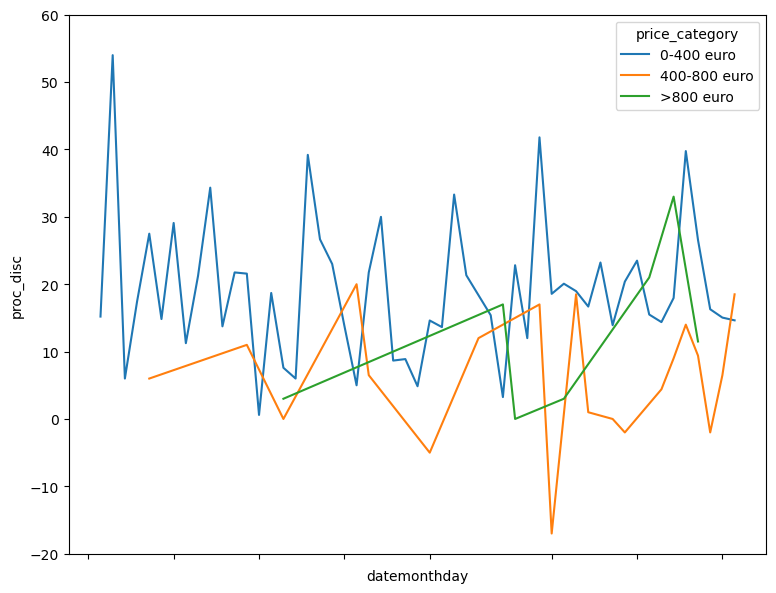

In [374]:
fig, ax = plt.subplots(figsize=(9, 7));
marall = sns.lineplot( data=marchapril, x = 'datemonthday' , y='proc_disc', hue = 'price_category', ci=None)


marall.set_xticklabels(marall.get_xticklabels(),rotation=90)
marall.set_ylim(ymin=-20,ymax=60)

Text(0.5, 1.0, 'October')

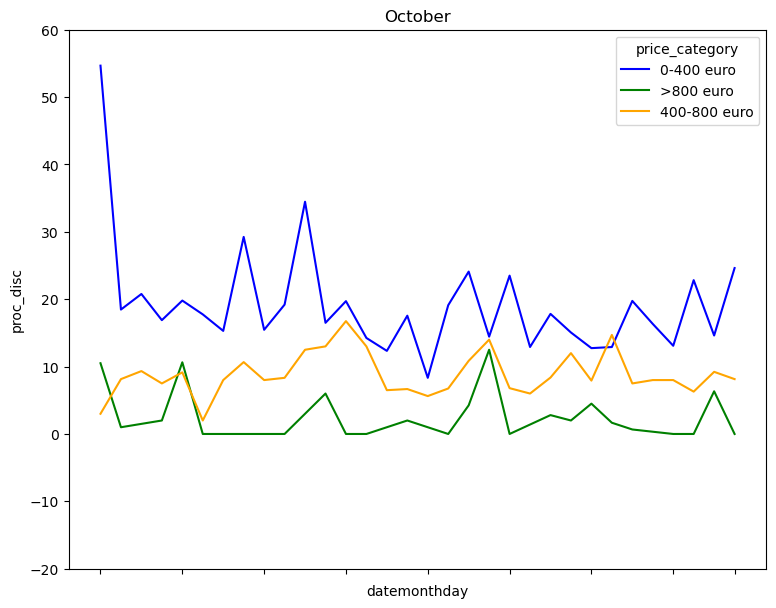

In [376]:
fig, ax = plt.subplots(figsize=(9, 7));
octApp = sns.lineplot( data=octoberApp, x = 'datemonthday' , y='proc_disc', hue = 'price_category', ci=None, palette=['blue', 'green', 'orange'])



octApp.set_xticklabels(octApp.get_xticklabels(),rotation=90)
octApp.set_ylim(ymin=-20,ymax=60)
octApp.set_title('October')

Text(0.5, 1.0, 'Black Friday - Cyber Monday')

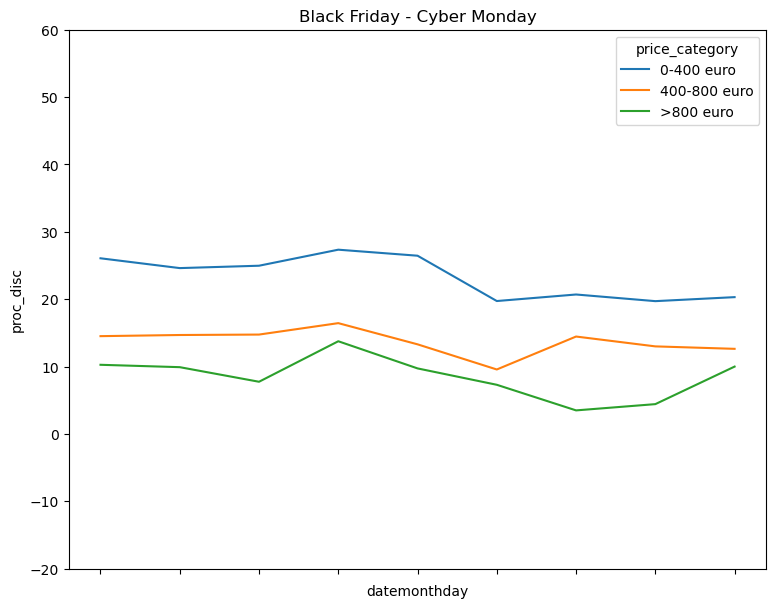

In [278]:
fig, ax = plt.subplots(figsize=(9, 7));
ala = sns.lineplot(data = blaack, x = 'datemonthday' , y='proc_disc', hue = 'price_category', ci= None)
ala.set_ylim(ymin=-20,ymax=60)
ala.set_xticklabels(octApp.get_xticklabels(),rotation=90)
ala.set_title('Black Friday - Cyber Monday')

Text(0.5, 1.0, 'Black Friday - Cyber Monday')

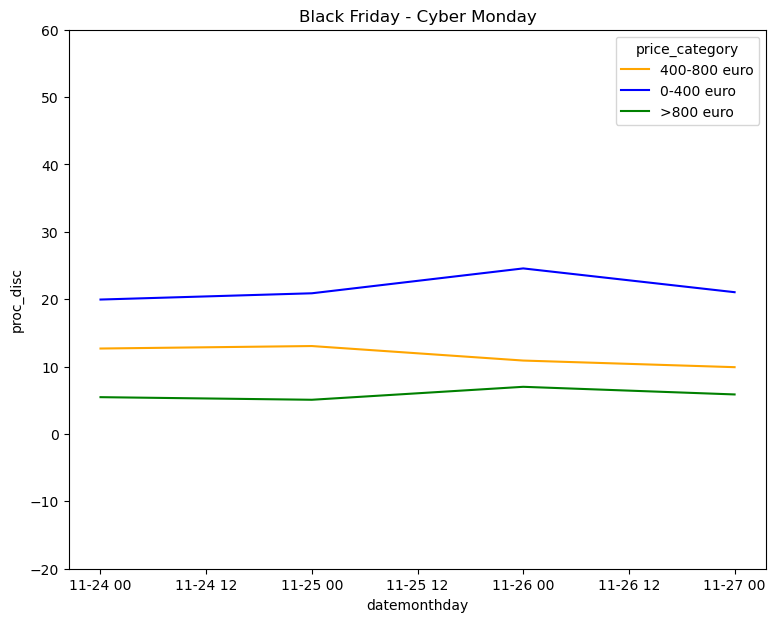

In [378]:
fig, ax = plt.subplots(figsize=(9, 7));
mara = sns.lineplot(ax=ax, data=blaackApp, x = 'datemonthday' , y='proc_disc', hue = 'price_category', ci=None, palette=['orange','blue','green'])

mara.set_ylim(ymin=-20,ymax=60)
mara.set_title('Black Friday - Cyber Monday')



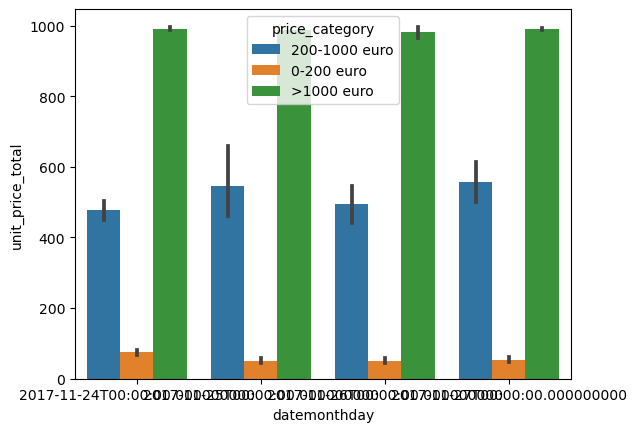

In [167]:
sns.barplot( data=blaackApp, x = 'datemonthday' , y='unit_price_total', hue = 'price_category');

In [166]:
blaackApp.head()

id_order                date  unit_price  \
31858    436485 2017-11-24 00:05:48      473.43   
31865    436507 2017-11-24 00:08:45       29.69   
31869    436516 2017-11-24 00:10:19       38.70   
31873    436529 2017-11-24 00:13:13       51.00   
31874    436532 2017-11-24 00:13:28      383.04   

                                                    name brand  discount  \
31858                  Apple iPad Wi-Fi 128GB Space Gray   APP     29.38   
31865  Apple Thunderbolt to Gigabit Ethernet Adapter Mac   APP      5.31   
31869            Apple iPhone Silicone Case X Case Black   APP      6.30   
31873                   IPhone AppleCare Protection Plan   APP     19.00   
31874  Apple Watch GPS 42mm Series 3 Aluminum Case an...   APP     15.96   

        price  unit_price_total      type  proc_disc  month datemonthday  \
31858  502.81            473.43      1714        6.0     11   2017-11-24   
31865   35.00             29.69      1325       15.0     11   2017-11-24   
31869   45.00             38.70  11865403       14.0     11   2017-11-24   
31873   70.00             51.00      1231       27.0     11   2017-11-24   
31874  399.00            383.04  24895185        4.0     11   2017-11-24   

              range_discount short   long price_category  
31858        Discount 5%-20%   APP  Apple  200-1000 euro  
31865        Discount 5%-20%   APP  Apple     0-200 euro  
31869        Discount 5%-20%   APP  Apple     0-200 euro  
31873       Discount 20%-50%   APP  Apple     0-200 euro  
31874  Less than 5% discount   APP  Apple  200-1000 euro

In [ ]:
blaack1 = blaack.groupby(by=['price_category','datemonthday'],as_index=False).agg({'proc_disc':'mean', 'unit_price_total':'sum'})


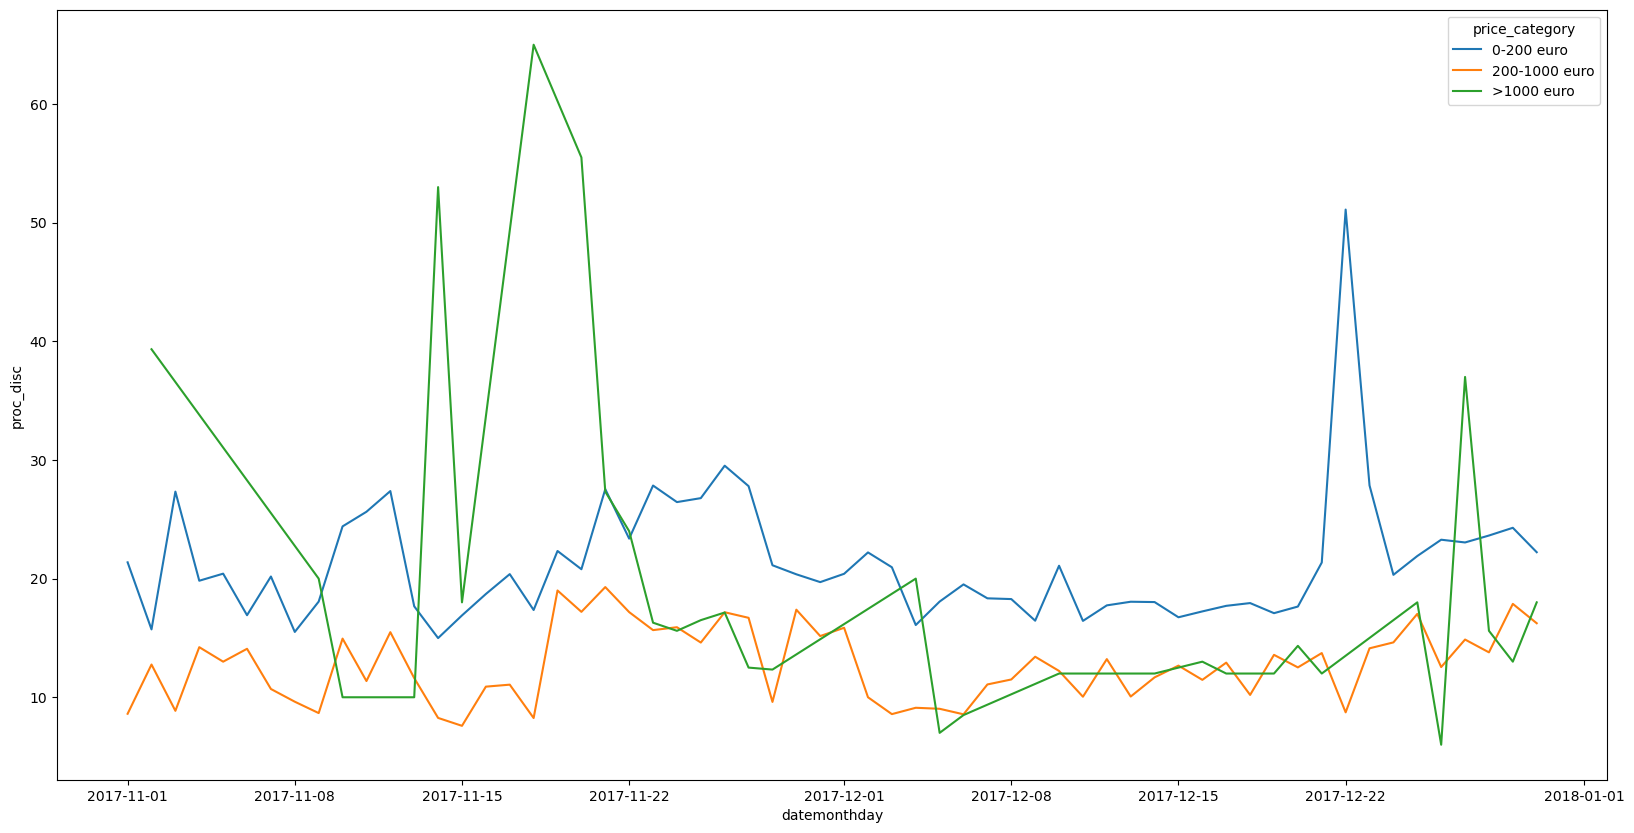

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10));
sns.lineplot(ax=ax, data=blaack1, x = 'datemonthday' , y='proc_disc', hue = 'price_category');

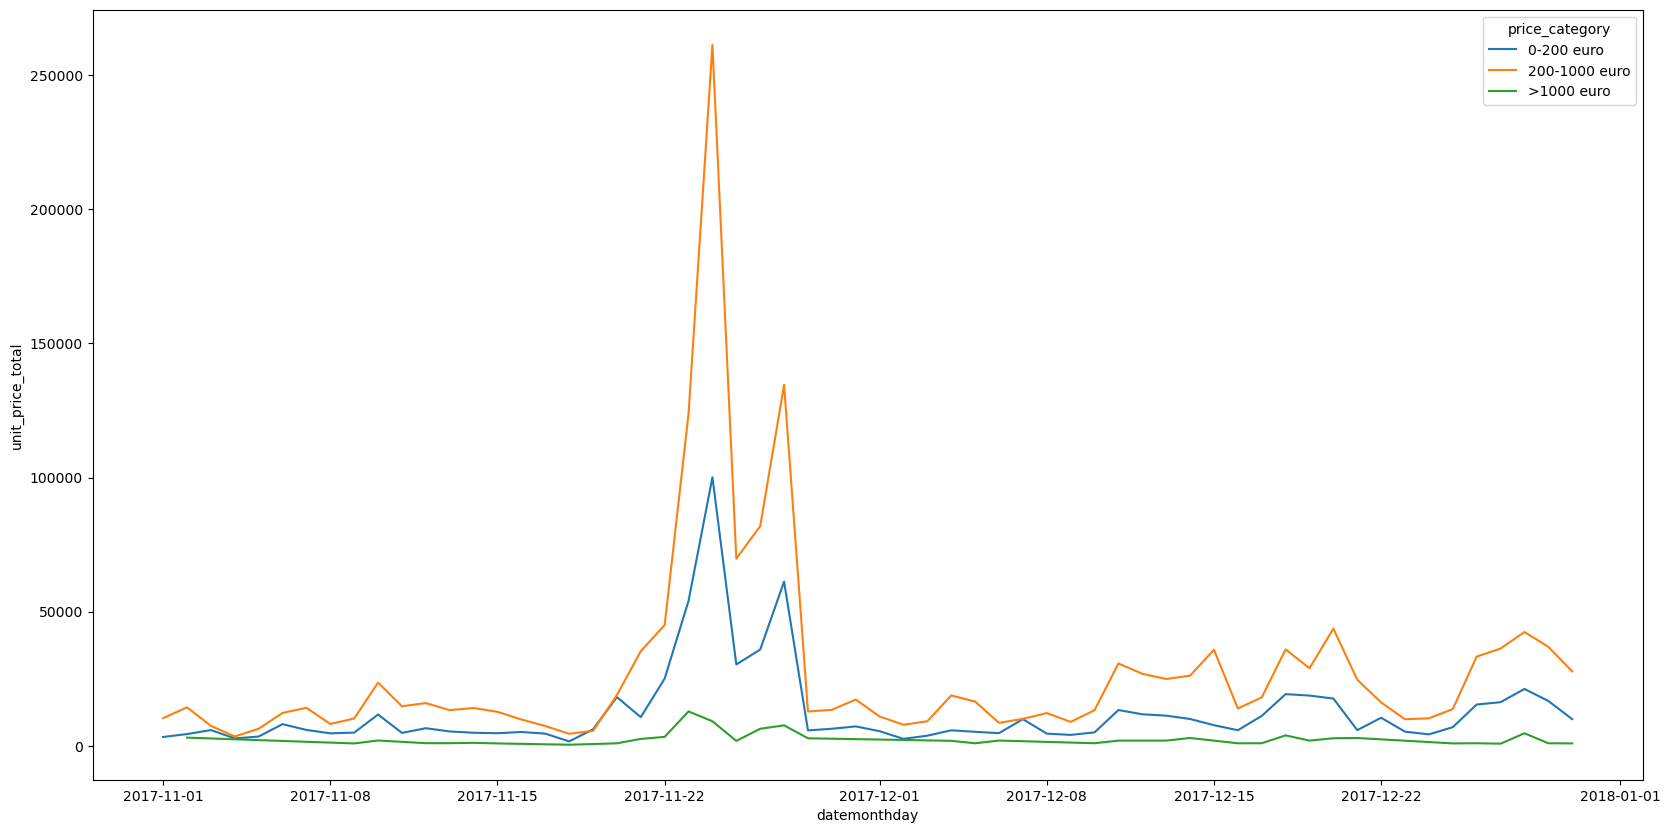

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10));
sns.lineplot(ax=ax, data=blaack1, x = 'datemonthday' , y='unit_price_total', hue = 'price_category');

In [ ]:
sns.lineplot(data = opr, )

<AxesSubplot:xlabel='price', ylabel='proc_disc'>

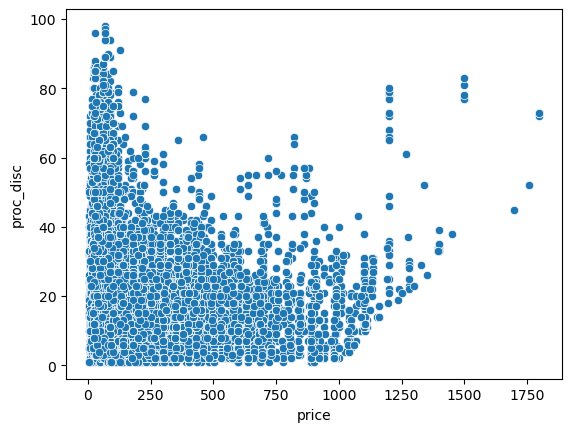

In [ ]:
sns.scatterplot(data=orderl_prodmore, x='price', y='proc_disc')

In [ ]:
sns.lineplot(data=)

In [ ]:
orderl_prod.groupby(['long', 'month']).agg({'discount':['mean','sum'], 'unit_price_total':['mean','sum'] })

discount         unit_price_total        
                      mean     sum             mean     sum
long      month                                            
8Mobility 1      17.655000   70.62        22.342500   89.37
          2      19.260000   77.04        15.740000   62.96
          3      22.150000   22.15        12.850000   12.85
          4      11.010000   77.07        23.990000  167.93
          5      11.010000   22.02        23.990000   47.98
...                    ...     ...              ...     ...
iOttie    8       6.423125  102.77        19.799375  316.79
          9       6.262857   43.84        28.987143  202.91
          10      7.123000   71.23        23.855000  238.55
          11      8.654500  173.09        20.709000  414.18
          12      6.740000  128.06        21.921579  416.51

[1453 rows x 4 columns]

In [ ]:
orderl_prod.groupby(['long']).agg({'proc_disc':['mean']})

proc_disc
                mean
long                
8Mobility  43.055556
Adonit     14.037234
Aiino      49.000000
Akitio     10.920455
Allocacoc  19.606349
...              ...
Zepp       23.500000
iFixit      9.215374
iFrogz      9.500000
iHealth     8.194444
iOttie     22.299435

[176 rows x 1 columns]

In [100]:
orders_Apple = orderl_prod.loc[orderl_prod['long']=='Apple',:]

KeyError: 'long'

<AxesSubplot:xlabel='datemonthday', ylabel='discount'>

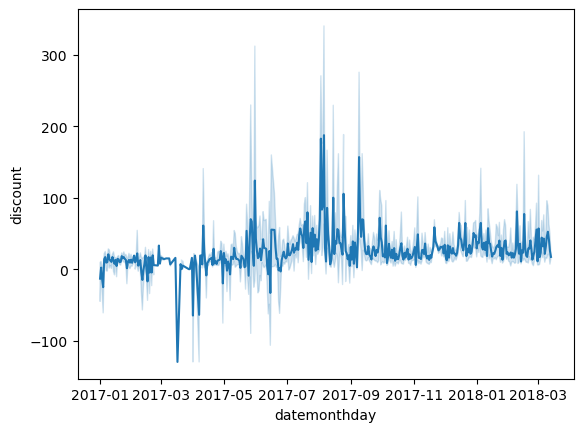

In [ ]:
sns.lineplot(data=orders_Apple, x='datemonthday', y= 'discount')

<AxesSubplot:xlabel='datemonthday', ylabel='proc_disc'>

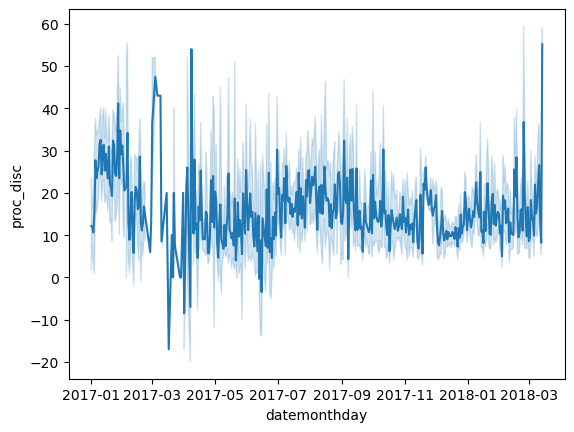

In [ ]:
sns.lineplot(data=orders_Apple, x='datemonthday', y= 'proc_disc')

In [ ]:
aggApple = orders_Apple.groupby(by='discount_category').agg({'discount':['mean','sum'], 'unit_price_total':['mean','sum']}).reset_index()

discount            unit_price_total            
                         mean        sum             mean         sum
discount_category                                                    
0-50 euro           14.395279  109288.96       192.209316  1459253.13
200-1000 euro      320.743193   53243.37       613.472349   101836.41
50-200 euro         84.911817  152841.27       463.215589   833788.06
Price increased    -93.892176  -15961.67       807.522765   137278.87
no discount          0.000000       0.00       168.587971   114639.82

In [ ]:
sns.barplot()

In [ ]:
count_order_apple = orders_Apple.groupby(by='range_discount', as_index=False)['id_order'].count()

In [ ]:
count_order_apple1 = orders_Apple.groupby(by='discount_category', as_index=False)['id_order'].count()

In [ ]:
count_order_apple

range_discount  id_order
0           Discount 20%-50%      1983
1            Discount 5%-20%      4381
2           Discount 50%-75%       877
3  Discount more than 75%!!!        37
4   Higher price than before       161
5      Less than 5% discount      2204
6                No discount       765

In [ ]:
count_order_apple.sort_values(by='id_order', ascending=False, inplace=True)

In [ ]:
count_order_apple1.sort_values(by='id_order', ascending=False, inplace=True)

[Text(0.5, 1.0, 'Apple: discounts')]

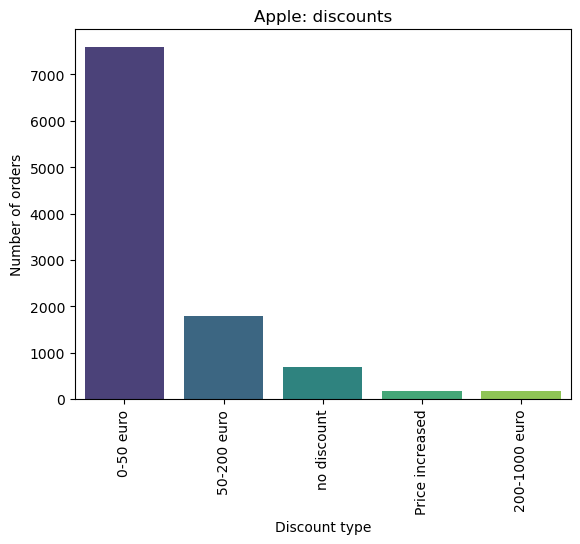

In [ ]:
chartApple1 = sns.barplot(data = count_order_apple1, x='discount_category', y= 'id_order', palette='viridis')
chartApple1.set_xticklabels(chartApple1.get_xticklabels(),rotation=90)
chartApple1.set(ylabel='Number of orders', xlabel='Discount type')
chartApple1.set(title="Apple: discounts")

In [ ]:
count_order_apple

range_discount  id_order
1            Discount 5%-20%      4381
5      Less than 5% discount      2204
0           Discount 20%-50%      1983
2           Discount 50%-75%       877
6                No discount       765
4   Higher price than before       161
3  Discount more than 75%!!!        37

[Text(0.5, 1.0, 'Apple: discounts')]

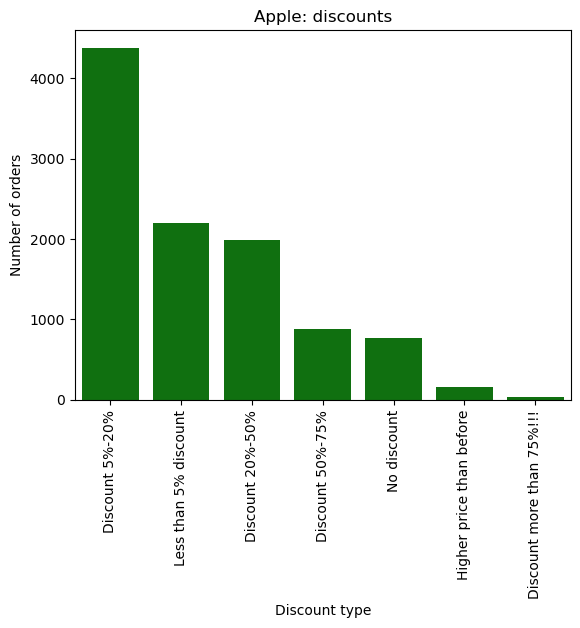

In [ ]:
chartApple = sns.barplot(data = count_order_apple, x='range_discount', y= 'id_order', palette='viridis')
chartApple.set_xticklabels(chartApple.get_xticklabels(),rotation=90)
chartApple.set(ylabel='Number of orders', xlabel='Discount type')
chartApple.set(title="Apple: discounts")

<AxesSubplot:xlabel='long'>

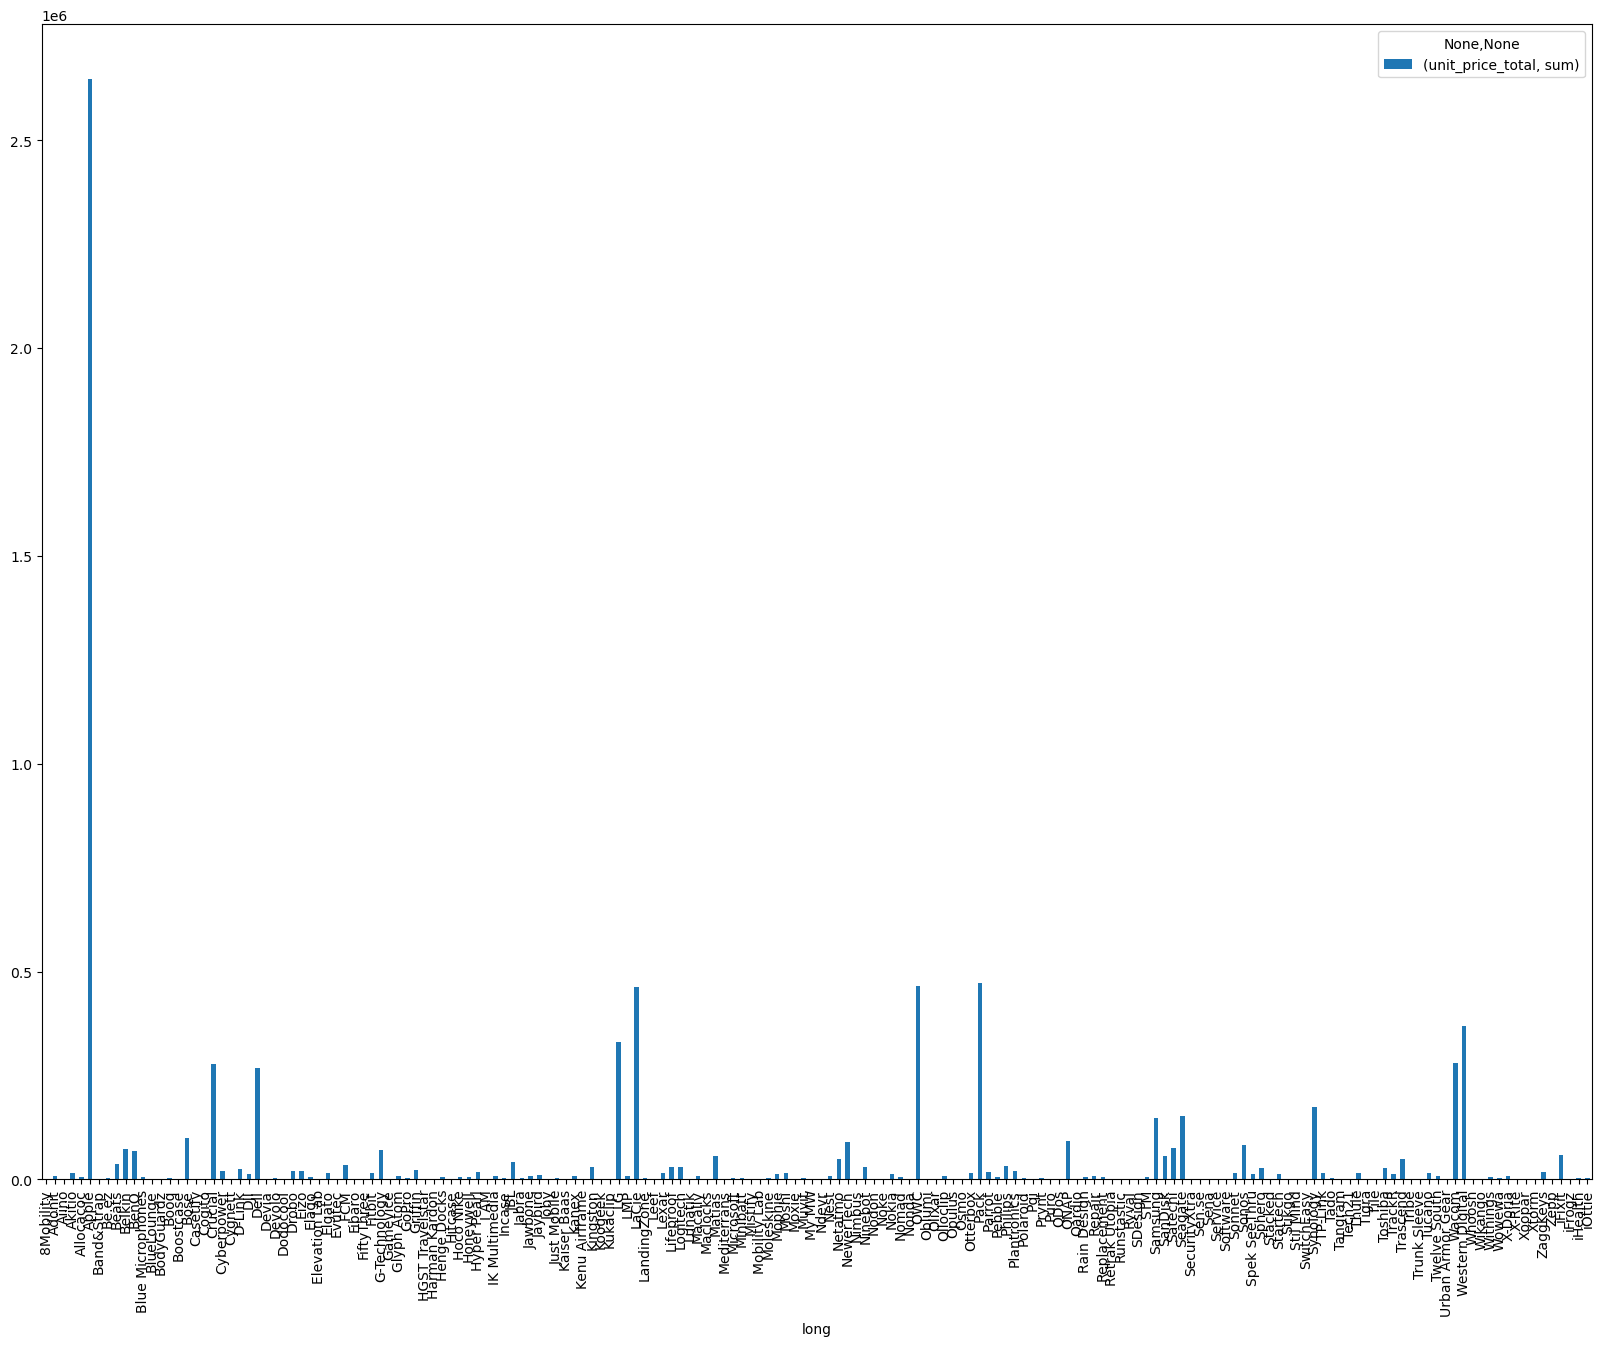

In [ ]:
orderl_prod.groupby(['long']).agg({'unit_price_total':['sum'] }).plot.bar(figsize= (20,15))

In [ ]:
ord_Apple = orderl_prod.loc[orderl_prod['long']=='Apple',:]

In [ ]:
ord_Apple.head()

id_order                date  unit_price  \
2     295347 2017-01-01 01:54:11       72.19   
14    299610 2017-01-01 10:52:42       55.99   
15    299610 2017-01-01 10:53:10       84.99   
32    299681 2017-01-01 13:09:14       69.34   
35    299704 2017-01-01 13:41:17       12.99   

                                                 name brand  discount  price  \
2   Apple 85W MagSafe 2 charger MacBook Pro screen...   APP     16.81   89.0   
14                  Apple Mac Keyboard Keypad Spanish   APP      3.01   59.0   
15                                Apple Magic Mouse 2   APP      4.01   89.0   
32   Apple 45W MagSafe 2 charger MacBook Air in Ju...   APP     19.66   89.0   
35  OEM USB Cable for iPhone iPad Dock and Apple i...   APP     12.01   25.0   

    unit_price_total  proc_disc  month datemonthday         range_discount  \
2              72.19       19.0      1   2017-01-01        Discount 5%-20%   
14             55.99        5.0      1   2017-01-01  Less than 5% discount   
15             84.99        5.0      1   2017-01-01  Less than 5% discount   
32             69.34       22.0      1   2017-01-01       Discount 20%-50%   
35             12.99       48.0      1   2017-01-01       Discount 20%-50%   

     long  
2   Apple  
14  Apple  
15  Apple  
32  Apple  
35  Apple

In [ ]:
orderl_prod.head()

id_order                date  unit_price  \
0    299545 2017-01-01 01:46:16       47.49   
1    299546 2017-01-01 01:50:34       18.99   
2    295347 2017-01-01 01:54:11       72.19   
3    299556 2017-01-01 02:20:14       60.90   
4    299561 2017-01-01 02:38:50      142.49   

                                                name brand  discount   price  \
0  OWC In-line Digital Temperature Sensor Kit HDD...   OWC     13.50   60.99   
1               iOttie Easy View 2 Car Black Support   IOT      3.96   22.95   
2  Apple 85W MagSafe 2 charger MacBook Pro screen...   APP     16.81   89.00   
3                 (Open) Crucial 240GB SSD 7mm BX200   CRU     16.09   76.99   
4                 Pebble Smartwatch Time Steel Black   PEB    157.50  299.99   

   unit_price_total  proc_disc  month datemonthday    range_discount     long  
0             47.49       22.0      1   2017-01-01  Discount 20%-50%      OWC  
1             18.99       17.0      1   2017-01-01   Discount 5%-20%   iOttie  
2             72.19       19.0      1   2017-01-01   Discount 5%-20%    Apple  
3             60.90       21.0      1   2017-01-01  Discount 20%-50%  Crucial  
4            142.49       53.0      1   2017-01-01  Discount 50%-75%   Pebble

In [ ]:
orderl_prod['datemonthday']=pd.to_datetime(orderl_prod['datemonthday'])

In [ ]:
BFandCM2017 = orderl_prod.loc[(orderl_prod['datemonthday']=='2017-11-24')|(orderl_prod['datemonthday']=='2017-11-27'),:]

In [ ]:
BFandCM2017agg = round(BFandCM2017.groupby('long').agg({'proc_disc':'mean', 'discount':'sum', 'unit_price_total':'sum'}))

In [ ]:
pd.set_option('display.max_rows', 1000)
pd.set_option("display.max_colwidth", 100)


In [ ]:
BFandCM2017agg['unit_price_total'].sum()

574054.0

In [ ]:
total = round(orderl_prod.groupby('long').agg({'proc_disc':'mean', 'discount':'sum', 'unit_price_total':'sum'}))

In [ ]:
total.head()

proc_disc  discount  unit_price_total
long                                            
8Mobility       43.0     544.0             756.0
Adonit          14.0    1594.0            7967.0
Aiino           49.0      32.0              33.0
Akitio          11.0    2833.0           15411.0
Allocacoc       20.0    1198.0            6084.0

[Text(0, 0.5, 'Revenue'), Text(0.5, 0, 'Percent of discount')]

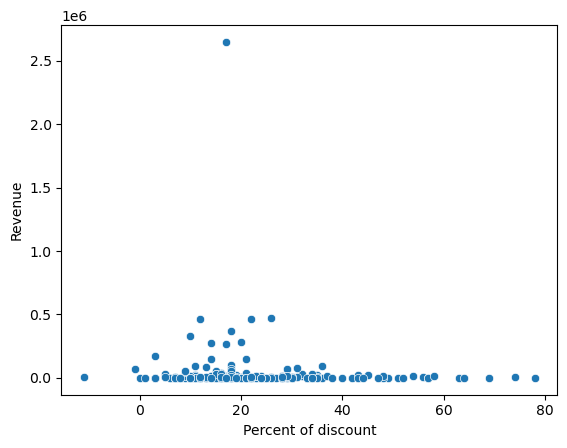

In [ ]:
tot = sns.scatterplot(data=total, x='proc_disc', y='unit_price_total')
tot.set(ylabel='Revenue', xlabel='Percent of discount')

[Text(0, 0.5, 'Revenue'), Text(0.5, 0, 'Discount (euro)')]

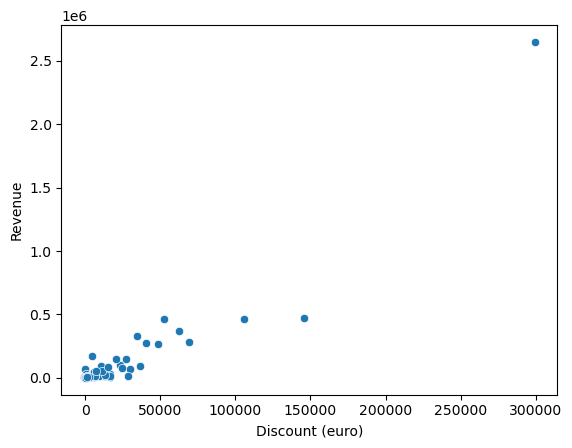

In [ ]:
tota = sns.scatterplot(data=total, x='discount', y='unit_price_total')
tota.set(ylabel='Revenue', xlabel='Discount (euro)')

[Text(0, 0.5, 'Ravenue'), Text(0.5, 0, 'Percent of discount')]

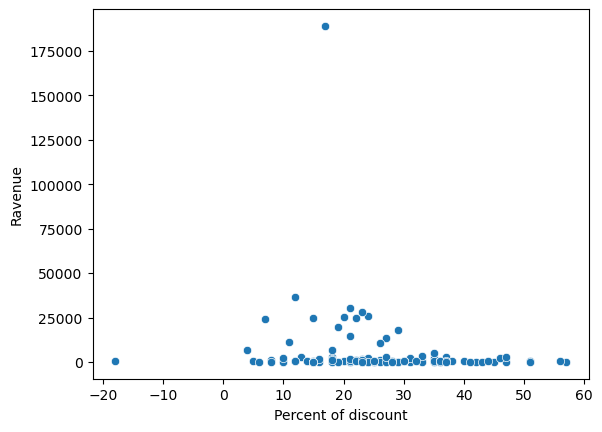

In [ ]:
bf = sns.scatterplot(data=BFandCM2017agg, x='proc_disc', y='unit_price_total')

bf.set(ylabel='Ravenue', xlabel='Percent of discount')


[Text(0, 0.5, 'Ravenue'), Text(0.5, 0, 'Discount (euro)')]

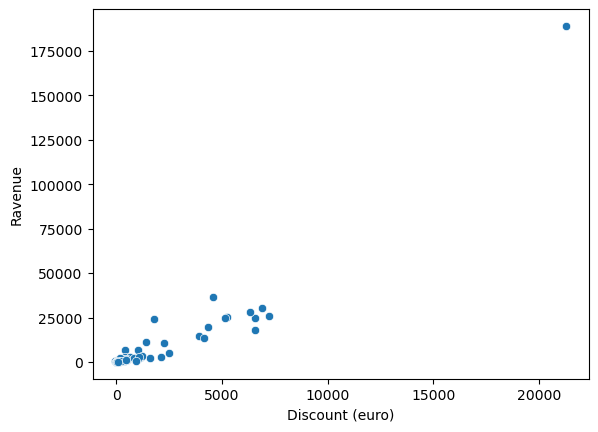

In [ ]:
bfd=sns.scatterplot(data=BFandCM2017agg, x='discount', y='unit_price_total')
bfd.set(ylabel='Ravenue', xlabel='Discount (euro)')

In [ ]:
#pip install seaborn --upgrade

     -------------------------------------- 293.3/293.3 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2
Note: you may need to restart the kernel to use updated packages.


[Text(0, 0, 'Moxie'),
 Text(1, 0, 'Griffin'),
 Text(2, 0, 'NewerTech'),
 Text(3, 0, 'ZaggKeys'),
 Text(4, 0, 'Plantronics'),
 Text(5, 0, 'Kanex'),
 Text(6, 0, 'Evutec'),
 Text(7, 0, 'SwitchEasy'),
 Text(8, 0, 'Band&Strap'),
 Text(9, 0, 'Otterbox')]

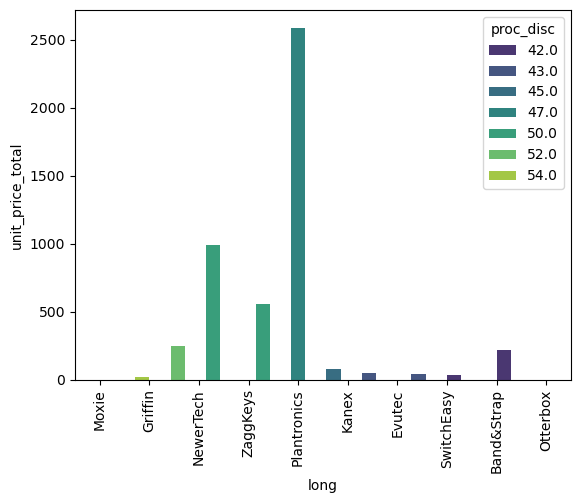

In [ ]:
bfpd = sns.barplot(data = BlackFriproc_disc, x= 'long', y= 'unit_price_total', hue = 'proc_disc', palette='viridis',width=2)
bfpd.set_xticklabels(bfpd.get_xticklabels(),rotation=90)



[Text(0, 0, 'Apple'),
 Text(1, 0, 'LG'),
 Text(2, 0, 'Sonos'),
 Text(3, 0, 'Pack'),
 Text(4, 0, 'Western Digital'),
 Text(5, 0, 'LaCie'),
 Text(6, 0, 'Wacom'),
 Text(7, 0, 'Synology'),
 Text(8, 0, 'Dell'),
 Text(9, 0, 'Crucial')]

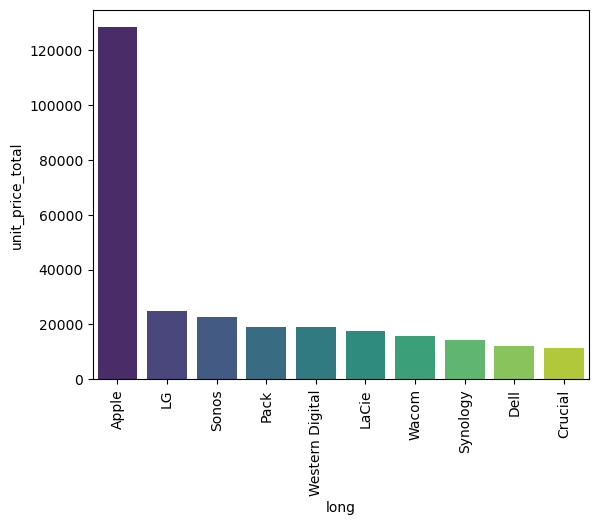

In [ ]:
bfrav = sns.barplot(data = BFunit_price_total, x= 'long', y= 'unit_price_total',  palette='viridis', width=0.8)
bfrav.set_xticklabels(bfrav.get_xticklabels(),rotation=90)

[Text(17491.0, 0, ''),
 Text(17493.0, 0, ''),
 Text(17495.0, 0, ''),
 Text(17497.0, 0, ''),
 Text(17499.0, 0, ''),
 Text(17501.0, 0, '')]

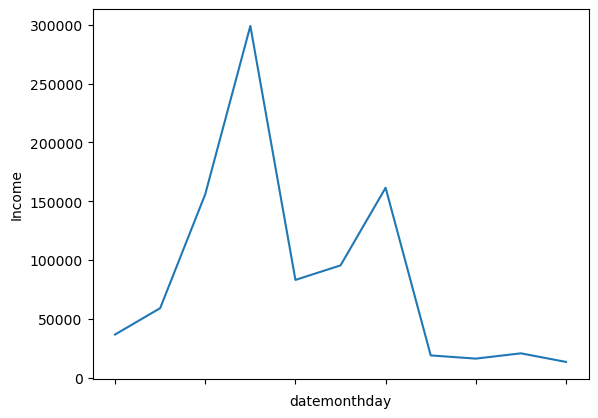

In [ ]:
blackfriday = sns.lineplot(data=disc_unit_price_total_black_friday, x='datemonthday', y= 'Income')
blackfriday.set_xticklabels(blackfriday.get_xticklabels(),rotation=90)
